# IFQ509: Data Exploration and Mining

Within this code we delve into the application of various **data mining techniques** to analyze real-world scenarios. By employing both **descriptive** and **predictive data mining** methods, the analysis highlights actionable insights and patterns within the data. 

Techniques covered include:

- **Association Mining**: Uncover relationships between variables.
- **Clustering**: Group data into meaningful clusters.
- **Decision Trees**: Classify data and make predictions.
- **Logistic Regression**: Model binary outcomes and interpret probabilities.
- **Neural Networks**: Capture complex patterns and relationships for predictive tasks.

These methods are utilized to explore datasets systematically, providing a comprehensive understanding of the underlying patterns and trends.

---

## Prerequisites

To ensure the analysis runs seamlessly, the following Python packages are required:

- **`pandas`**: Data manipulation and analysis.
- **`numpy`**: Numerical computations.
- **`matplotlib`**: Data visualization through plots and charts.
- **`seaborn`**: Advanced statistical data visualization.
- **`scikit-learn`**: Machine learning algorithms and utilities.
- **`mlxtend`**: Extended machine learning functionalities.
- **`tabulate`**: Tabular data display in a readable format.

### Installation Instructions
You can install these packages using `pip`. For example:
```bash
pip install pandas numpy matplotlib seaborn scikit-learn mlxtend tabulate
```

With these tools in place, this report demonstrates practical implementations of data mining techniques, bridging the gap between theoretical concepts and real-world applications.

# Dataset Cleaning and Preprocessing Overview

The data cleaning and preprocessing process is a critical step in preparing a dataset for analysis. This report focuses on a movie dataset containing columns such as `movieId`, `title`, and `timestamp`. Proper data cleaning involves identifying and resolving missing values, formatting timestamps, and validating the dataset's structure. These steps are essential for ensuring data integrity and enabling accurate analyses in subsequent tasks (Kelleher & Tierney, 2018; Kim et al., 2021).


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'D1.csv'
# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)  

print("\033[95m" + "="*50 + "\033[0m")
# Display the shape of the dataset
print("\033[95m" + "Initial Dataset Shape:" + "\033[0m", df.shape)
# Colored formatting (\033[95m) is applied for better readability. 
print("\033[95m" + "="*50 + "\033[0m")

# Display data types of columns
print("\033[95m" + "\nDisplaying initial data types of columns to understand the structure of the dataset:\n" + "\033[0m")
df_types = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
# Converts this information into a DataFrame for clean presentation
df_types.columns = ['Column', 'Data Type']
print(df_types)

# Check and resolve NaN values in 'movieId'
print("\033[95m" + "\nChecking and resolving NaN values in 'movieId' to ensure data integrity:\n" + "\033[0m")
if 'movieId' in df.columns and 'title' in df.columns and 'timestamp' in df.columns:
    # Initial count of NaN in 'movieId'
    initial_nan_count = df['movieId'].isna().sum()
    # Display initial NaN count
    print("\033[95m" + f"\nInitial NaN values in 'movieId': {initial_nan_count}" + "\033[0m")
    
    if initial_nan_count > 0:
        # Display rows with NaN in 'movieId' along with their 'title' and 'timestamp'
        print("\033[95mRows with NaN in 'movieId' (along with 'title' and 'timestamp'):\033[0m")
        # Display relevant columns
        print(df[df['movieId'].isna()][['title', 'timestamp', 'movieId']])  

        # Handle rows with NaN in 'movieId'
        missing_ids = df[df['movieId'].isna()]  # Rows with missing movieId
        for index, row in missing_ids.iterrows():
            # Create a new movieId using the start of the title and timestamp
            title_part = row['title'][:5].upper()  # First 5 characters of the title, uppercase
            timestamp_part = pd.to_datetime(row['timestamp'], errors='coerce').strftime('%Y%m%d%H%M%S')
             # Combine title and timestamp
            new_id = f"{title_part}_{timestamp_part}" 
            df.at[index, 'movieId'] = new_id  # Assign the new movieId

        # Convert 'movieId' to string for consistency with new format
        df['movieId'] = df['movieId'].astype(str)
        # Display the shape of the dataset after assigning new 'movieId'
        print("\033[95m" + "After Assigning New 'movieId':" + "\033[0m", df.shape)

        # Display details of newly assigned IDs
        print("\033[95mNewly Assigned movieIds with Titles and Timestamps:\033[0m")
        # Show only newly created IDs
        print(df[df['movieId'].str.contains('_')][['movieId', 'title', 'timestamp']]) 

# Inspect and clean 'timestamp'
print("\033[95m" + "\nInspecting and cleaning 'timestamp' to ensure proper datetime format:\n" + "\033[0m")
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')  
    # Convert to datetime format
    failed_timestamps = df['timestamp'].isna().sum()  
    # Count rows with failed conversions
    print("\033[95m" + f"\nRows with failed 'timestamp' conversions: {failed_timestamps}" + "\033[0m")
    
    # Drop rows with failed conversions for 'timestamp'
    df = df.dropna(subset=['timestamp'])  
    # Remove rows with NaT in 'timestamp'
    print("\033[95m" + "After Converting 'timestamp' to datetime:" + "\033[0m", df.shape)

# Display final data summary
print("\033[95m" + "\nDisplaying final data types after cleaning to verify changes:\n" + "\033[0m")
df_types_cleaned = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()  
# Create DataFrame for data types
df_types_cleaned.columns = ['Column', 'Data Type']
print(df_types_cleaned)

print("\033[95m" + "\nDisplaying a sample of the cleaned data to ensure correctness:\n" + "\033[0m")
print(df.head())  # Display the first few rows of the cleaned dataset


Initial Dataset Shape: (8000, 6)

Displaying initial data types of columns to understand the structure of the dataset:

      Column Data Type
0     userId     int64
1    movieId   float64
2     rating   float64
3  timestamp    object
4     imdbId    object
5      title    object

Checking and resolving NaN values in 'movieId' to ensure data integrity:


Initial NaN values in 'movieId': 42
Rows with NaN in 'movieId' (along with 'title' and 'timestamp'):
                                     title         timestamp  movieId
698                                Dracula  16/04/2003 13:28      NaN
699                          Jerry Maguire  03/12/1997 16:32      NaN
700     An American Tail: Fievel Goes West  07/03/2003 21:36      NaN
701                                 Breach   09/12/2008 3:11      NaN
702                             Swing Kids   10/12/2000 5:29      NaN
703                           My Bodyguard   09/03/2000 6:21      NaN
704                         Chain Reaction   20/02/2

C:\Users\ejfur\AppData\Local\Temp\ipykernel_27792\610672836.py:42: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timestamp_part = pd.to_datetime(row['timestamp'], errors='coerce').strftime('%Y%m%d%H%M%S')
C:\Users\ejfur\AppData\Local\Temp\ipykernel_27792\610672836.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'DRACU_20030416132800' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'movieId'] = new_id  # Assign the new movieId
C:\Users\ejfur\AppData\Local\Temp\ipykernel_27792\610672836.py:42: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timestamp_part = pd.to_datetime(row['timestamp'], errors='coerce').s

## Association Analysis with Apriori Algorithm

The Apriori algorithm is widely used for association rule mining to identify relationships between items in transactional datasets. In this analysis, the Apriori method is applied to a movie dataset where the films watched by each user are treated as individual transactions. The goal is to identify frequent itemsets and generate association rules, offering insights into user viewing patterns and preferences (Agrawal et al., 1993).



Sample Transactions Grouped by UserId:
 userId                                                                                                                                                                                                                                                  title
      4 [Addams Family Values, Mystery Men, The Fly, Fast Times at Ridgemont High, The Addams Family, National Lampoon's Loaded Weapon 1, Jurassic Park, Lethal Weapon 3, The Princess Bride, The Neverending Story, Wild Things, GoodFellas, Sixteen Candles]
      5                                                                      [Road to Perdition, Almost Famous, Miss Congeniality, Hotel Rwanda, Panic Room, Charlie and the Chocolate Factory, The Wedding Singer, The Breakfast Club, The Graduate, Vertigo]
      6                                                                                                                                                                                            

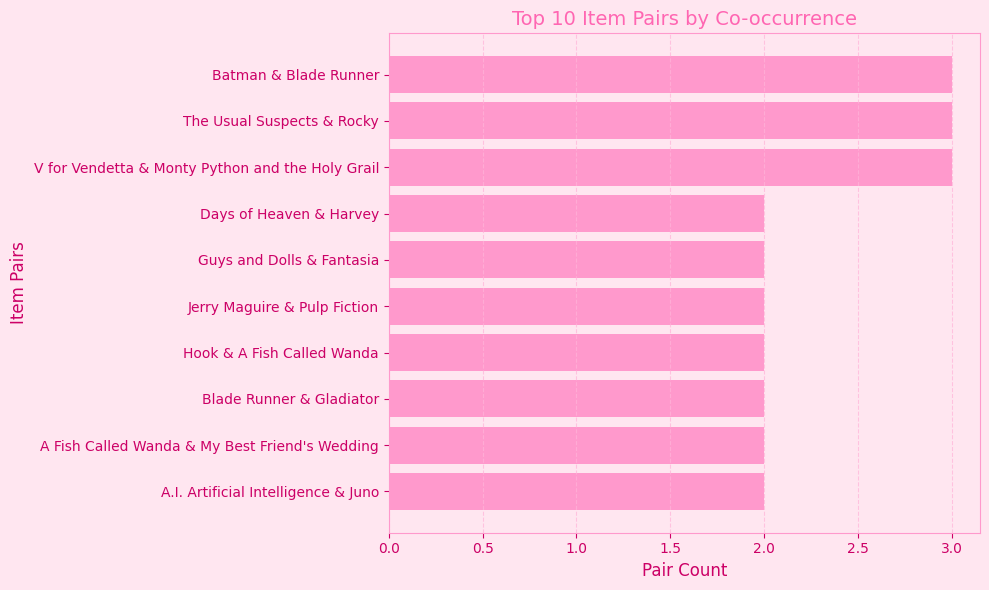

In [60]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

# Group data by `userId` to create transactions
transactions = df.groupby("userId")["title"].apply(list).reset_index()

# Display Sample Transactions
print("\033[95m\nSample Transactions Grouped by UserId:\033[0m")
# Avoid default index for clean printing
print(transactions.head().to_string(index=False))

# Generate all possible movie pairs within each user's transactions
transaction_pairs = []
for _, row in transactions.iterrows():
    # Get movie titles rated by the user
    items = row["title"]
    # Generate all possible pairs of movies
    pairs = list(combinations(items, 2))
    transaction_pairs.extend(pairs)

# Create `pair_df` DataFrame with proper column names
pair_df = pd.DataFrame(transaction_pairs, columns=["Item 1", "Item 2"])
pair_df["Pair Count"] = 1  # Initialize pair count as 1 for each pair

# Debugging: Display Sample Pairs Data
print("\033[95m\nSample Pairs Data (pair_df):\033[0m")
print(pair_df.head().to_string(index=False))

# Group by item pairs and count occurrences
print("\033[95m\nGrouping by item pairs and counting occurrences:\033[0m")
pair_counts = pair_df.groupby(["Item 1", "Item 2"]).sum().reset_index()

# Sort by `Pair Count` in descending order
print("\033[95m\nSorting item pairs by `Pair Count` in descending order:\033[0m")
pair_counts = pair_counts.sort_values("Pair Count", ascending=False)

# Display Top 10 Item Pairs by Co-occurrence
print("\033[95m\nTop 10 Item Pairs by Co-occurrence:\033[0m")
print(pair_counts.head(10).to_string(index=False))  # Avoid default index for clean printing

# Visualization: Plot top 10 item pairs by co-occurrence
print("\033[95m\nVisualizing the top 10 item pairs by co-occurrence:\033[0m")
plt.figure(figsize=(10, 6))
plt.barh(
    [f"{row['Item 1']} & {row['Item 2']}" for _, row in pair_counts.head(10).iterrows()],
    pair_counts.head(10)["Pair Count"],
    color="#ff99cc"  # Pastel pink for a pretty theme
)
plt.xlabel("Pair Count", fontsize=12, color="#cc0066")  # Pink axis label
plt.ylabel("Item Pairs", fontsize=12, color="#cc0066")  # Pink axis label
plt.title("Top 10 Item Pairs by Co-occurrence", fontsize=14, color="#ff66b2")  # Pink title
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7, color="#ffb3d9")  # Pink grid lines
plt.gca().set_facecolor("#ffe6f0")  # Light pink background for the plot
plt.tight_layout()
plt.show()


# Analysis of Frequent Movie Pairs: Support and Confidence

The analysis of frequent movie pairs uses **Market Basket Analysis** principles to identify patterns in user ratings. By calculating metrics such as **Support** and **Confidence**, we can uncover meaningful relationships between movies that are commonly rated together. These insights are particularly useful for recommendation systems, user behavior analysis, and marketing strategies (Agrawal et al., 1993).

---

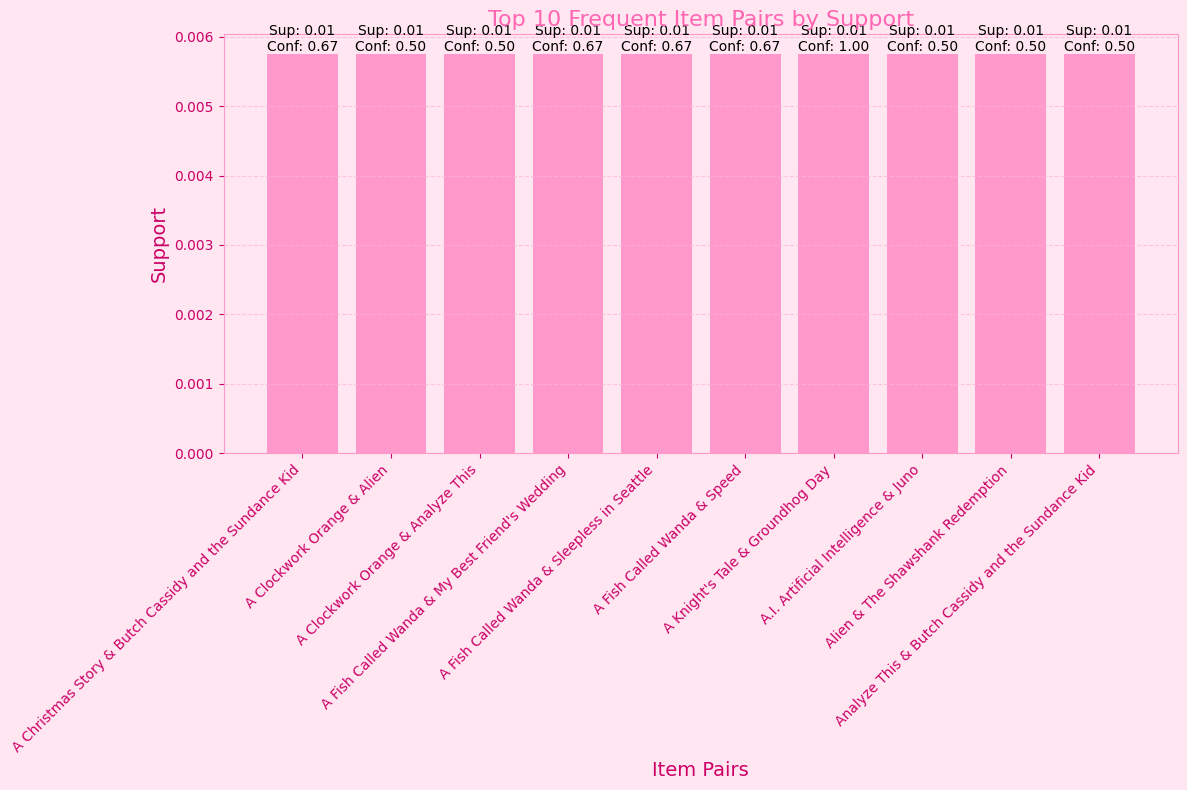

In [61]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns

# Group data by `userId` to create transactions
transactions = df.groupby("userId")["title"].apply(list).reset_index()

# Initialize an empty list to store all possible movie pairs within each user's transactions
transaction_pairs = []
for _, row in transactions.iterrows():
    items = row["title"]  # Get movie titles rated by the user
    pairs = list(combinations(items, 2))  # Generate all possible pairs of movies
    transaction_pairs.extend(pairs)  # Add pairs to the list

# Create a DataFrame from the list of pairs
pair_df = pd.DataFrame(transaction_pairs, columns=["Item 1", "Item 2"])
pair_df["Pair Count"] = 1  # Initialize pair count as 1 for each pair

# Group by item pairs and count occurrences
pair_counts = pair_df.groupby(["Item 1", "Item 2"]).sum().reset_index()

# Calculate Support for each pair
total_transactions = len(transactions)
pair_counts["Support"] = pair_counts["Pair Count"] / total_transactions

# Apply minimum support threshold
min_support = 0.005
frequent_pairs = pair_counts[pair_counts["Support"] >= min_support]

# Calculate individual item supports
item_support = (
    df.groupby("title")["title"]
    .count()
    .div(total_transactions)
    .reset_index(name="Support")
    .rename(columns={"title": "Item"})
)

# Merge support data for antecedents
frequent_pairs = frequent_pairs.merge(
    item_support, left_on="Item 1", right_on="Item", how="left"
)

# Rename columns for clarity
frequent_pairs.rename(columns={"Support_x": "Support Pair", "Support_y": "Support Item 1"}, inplace=True)
frequent_pairs.drop(columns=["Item"], inplace=True)

# Calculate Confidence for each pair
frequent_pairs["Confidence"] = frequent_pairs["Support Pair"] / frequent_pairs["Support Item 1"]

# Apply minimum confidence threshold
min_confidence = 0.5
filtered_pairs = frequent_pairs[frequent_pairs["Confidence"] >= min_confidence]

# Visualization: Top 10 frequent item pairs with a pink theme
if not filtered_pairs.empty:
    top_pairs = filtered_pairs.sort_values(by="Support Pair", ascending=False).head(10)
    labels = top_pairs.apply(lambda row: f"{row['Item 1']} & {row['Item 2']}", axis=1)
    supports = top_pairs["Support Pair"]
    confidences = top_pairs["Confidence"]

    if not supports.empty and not confidences.empty:
        plt.figure(figsize=(12, 8))
        bars = plt.bar(labels, supports, color="#ff99cc")  # Pastel pink bars
        plt.xlabel("Item Pairs", fontsize=14, color="#cc0066")  # Pink axis labels
        plt.ylabel("Support", fontsize=14, color="#cc0066")
        plt.title("Top 10 Frequent Item Pairs by Support", fontsize=16, color="#ff66b2")  # Pink title
        plt.xticks(rotation=45, ha="right", color="#cc0066")
        plt.gca().set_facecolor("#ffe6f0")  # Light pink background

        # Annotate bars with support and confidence values
        for bar, support, confidence in zip(bars, supports, confidences):
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"Sup: {support:.2f}\nConf: {confidence:.2f}",
                ha="center",
                va="bottom",
                fontsize=10,
                color="black"
            )

        # Add gridlines for better readability
        plt.grid(axis='y', linestyle='--', color="#ffb3d9", alpha=0.7)
        plt.tight_layout()
        plt.show()


# Analysis of Movie Preferences of "The Shawshank Redemption" Viewers

This analysis focuses on understanding the viewing habits of users who have watched the critically acclaimed film **"The Shawshank Redemption."** By identifying the movies frequently watched by this group, we can gain insights into their broader preferences and uncover patterns that might indicate common interests or complementary films.

The goal is to determine the **top five most-watched movies** by users who have seen "The Shawshank Redemption." This analysis can be valuable for building personalized recommendation systems or exploring trends among fans of this popular movie.

In [62]:
import pandas as pd

# Identify users who watched "The Shawshank Redemption"
shawshank_users = df[df['title'] == 'The Shawshank Redemption']['userId'].unique()

# Filter dataset for movies watched by these users
movies_watched_by_users = df[df['userId'].isin(shawshank_users)]

# Count the most watched movies by these users
most_watched_movies = movies_watched_by_users['title'].value_counts().head(5)

# Display results
print("\033[95mFive Most Watched Movies by Users Who Watched 'The Shawshank Redemption':\033[0m")

# Prints the most watched movies
print("\033[95m" + most_watched_movies.to_string() + "\033[0m")


Five Most Watched Movies by Users Who Watched 'The Shawshank Redemption':
title
The Shawshank Redemption                             12
The Lord of the Rings: The Fellowship of the Ring     3
The Third Man                                         2
Alien                                                 2
Stargate                                              2


# Analysis of Sequential Viewing Patterns


This analysis explores sequential viewing behavior among users who watched **"The Lord of the Rings: The Fellowship of the Ring"** (LOTR) and **"The Shawshank Redemption"** (Shawshank). The primary objective is to investigate whether users who watched both movies followed a specific order, specifically if they watched LOTR before Shawshank.

The analysis calculates:
1. The number of users who watched both movies.
2. The number and percentage of users who watched LOTR before Shawshank.
3. A baseline random association rate for comparison, representing the percentage of all users who watched Shawshank regardless of order.

Additionally, user viewing sequences are examined, and results are visualized using a bar chart to compare the observed sequential behavior against the baseline.


Data sorted by 'userId' and 'timestamp' to analyze viewing patterns sequentially.
Number of users who watched both movies: 3
Number of users who watched LOTR before Shawshank: 0
Percentage of users who watched LOTR before Shawshank: 0.00%
Baseline random association rate: 3.45%


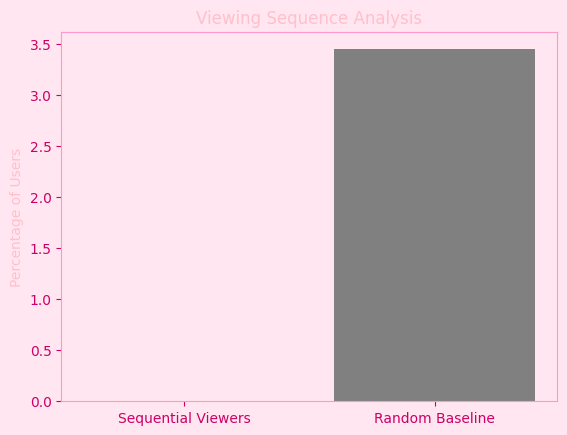

User Viewing Sequences:
userId
410                                                  [Braveheart, The Shawshank Redemption, Stargate, The Lord of the Rings: The Fellowship of the Ring]
521    [Star Trek III: The Search for Spock, Band of Brothers, The Shawshank Redemption, The Lord of the Rings: The Fellowship of the Ring, Deliverance]
572                         [The Notebook, Van Helsing, The Shawshank Redemption, American History X, The Lord of the Rings: The Fellowship of the Ring]
Name: title, dtype: object


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure full viewing sequences are displayed
pd.set_option('display.max_colwidth', None)
# Set pandas to show all rows when printing
pd.set_option('display.max_rows', None)

# Analyze Viewing Patterns for Sequential Behavior
df = df.sort_values(by=['userId', 'timestamp']).reset_index(drop=True)
print("\033[95m" + "Data sorted by 'userId' and 'timestamp' to analyze viewing patterns sequentially." + "\033[0m")

# Identify users who watched both movies
lotr_users = set(df[df['title'] == 'The Lord of the Rings: The Fellowship of the Ring']['userId'])
# Set of users who watched LOTR
shawshank_users = set(df[df['title'] == 'The Shawshank Redemption']['userId'])
# Set of users who watched Shawshank Redemption
common_users = lotr_users.intersection(shawshank_users)
# Set of users who watched both movies
print("\033[95m" + f"Number of users who watched both movies: {len(common_users)}" + "\033[0m")

# Check the order of viewing
def watched_in_order(user_id):
    user_data = df[df['userId'] == user_id].sort_values(by='timestamp')
    titles = user_data['title'].tolist()
    return 'The Lord of the Rings: The Fellowship of the Ring' in titles and \
           'The Shawshank Redemption' in titles and \
           titles.index('The Lord of the Rings: The Fellowship of the Ring') < titles.index('The Shawshank Redemption')

# Filter users who watched LOTR before Shawshank
users_in_order = [user for user in common_users if watched_in_order(user)]
# Users who watched LOTR before Shawshank
print("\033[95m" + f"Number of users who watched LOTR before Shawshank: {len(users_in_order)}" + "\033[0m")

# Calculate the percentage
percentage = len(users_in_order) / len(common_users) * 100 if common_users else 0
# Percentage of users who watched LOTR before Shawshank
print("\033[95m" + f"Percentage of users who watched LOTR before Shawshank: {percentage:.2f}%" + "\033[0m")

# Compare with a random baseline
total_users = len(set(df['userId']))
# Total number of users
shawshank_viewers = len(shawshank_users)
# Number of users who watched Shawshank
random_association = shawshank_viewers / total_users * 100
# Random association rate
print("\033[95m" + f"Baseline random association rate: {random_association:.2f}%" + "\033[0m")

# Visualization of Results
plt.bar(['Sequential Viewers', 'Random Baseline'], [percentage, random_association], color=['blue', 'gray'])
# Plot the bar chart
plt.ylabel('Percentage of Users', color="pink")
# Label the y-axis
plt.title('Viewing Sequence Analysis', color="pink")
# Set the title
plt.show()

# Display user sequences
user_sequences = df[df['userId'].isin(common_users)].groupby('userId')['title'].apply(list)
# Group user sequences
print("\033[95mUser Viewing Sequences:\033[0m")
# Display user sequences
print(user_sequences)


# Association Rule Mining and Analysis

This analysis leverages **Association Rule Mining** to uncover relationships between items (in this case, movies) frequently rated together by users. By identifying **frequent itemsets** and calculating key metrics like **support**, **confidence**, and **lift**, the goal is to derive meaningful insights into user preferences and viewing habits.

Using the **Apriori algorithm**, the analysis first identifies frequent combinations of movies (itemsets) based on a minimum support threshold. These itemsets form the foundation for generating **association rules**, which describe the likelihood of one set of movies being rated alongside another.



Top 5 Association Rules:

+-----------------------------------------------------------------+--------------------------------------------------------------------------+----------------------+------------+-------+
|                           antecedents                           |                               consequents                                |       support        | confidence | lift  |
+-----------------------------------------------------------------+--------------------------------------------------------------------------+----------------------+------------+-------+
|                         Shall We Dance                          | Harvey, Days of Heaven, The Truman Show, Around the World in Eighty Days | 0.005747126436781609 |    1.0     | 174.0 |
|     Harvey, Days of Heaven, Around the World in Eighty Days     |                     The Truman Show, Shall We Dance                      | 0.005747126436781609 |    1.0     | 174.0 |
| Around the World in Eighty Days, Day

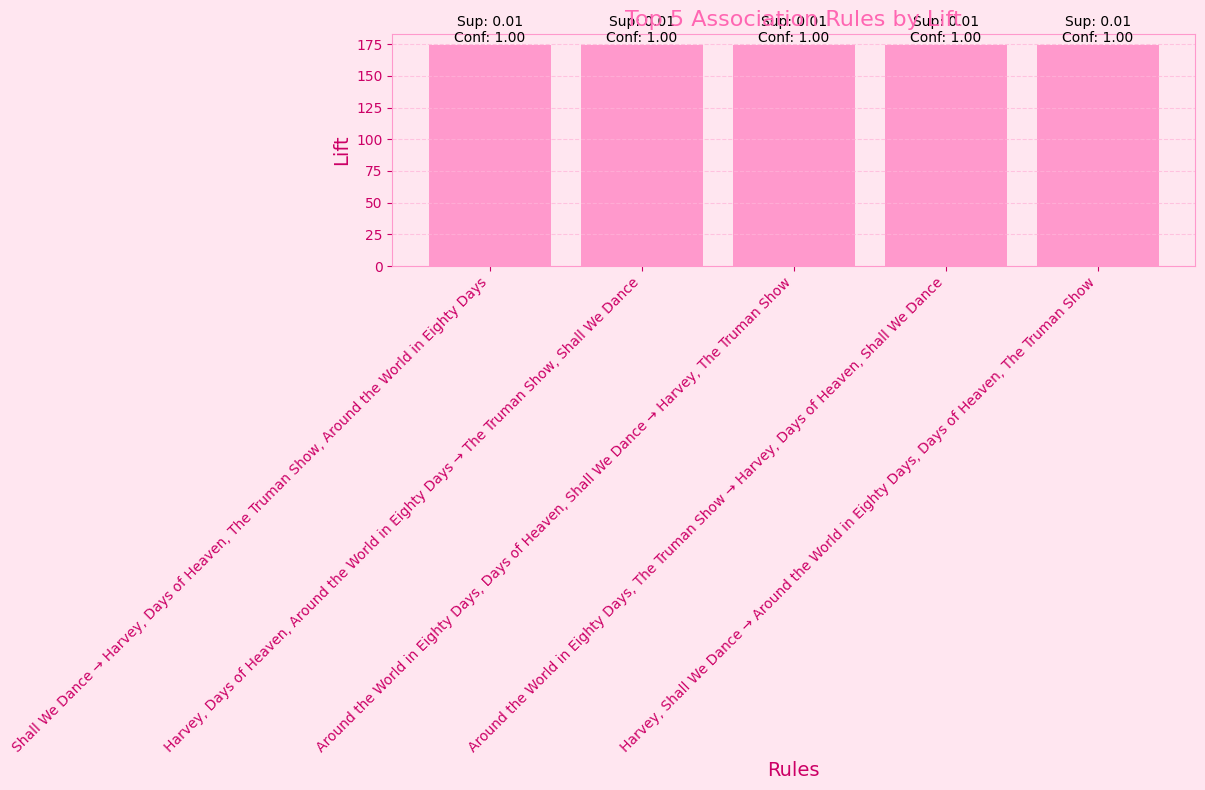

In [64]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate

# Prepare Transactions
transactions = df.groupby('userId')['title'].apply(list).tolist()

# Convert Transactions to One-Hot Encoded Format
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Identify Frequent Itemsets
min_support = 0.005
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Get the number of itemsets required by association_rules
num_itemsets = frequent_itemsets.shape[0]

# Generate Association Rules
min_confidence = 0.2
rules = association_rules(frequent_itemsets, num_itemsets, metric="confidence", min_threshold=min_confidence)

# Process and Display Top Rules
if not rules.empty:
    rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

    top_rules = rules.sort_values(by="lift", ascending=False).head(5)
    display_columns = ["antecedents", "consequents", "support", "confidence", "lift"]
    formatted_rules = top_rules[display_columns]

    print("\nTop 5 Association Rules:\n")
    print(tabulate(formatted_rules, headers="keys", tablefmt="pretty", showindex=False))
else:
    print("\nNo rules found. Consider lowering the thresholds for support or confidence.\n")

# Visualize Top Rules
if not rules.empty and not top_rules.empty:
    labels = top_rules.apply(lambda row: f"{row['antecedents']} → {row['consequents']}", axis=1)
    supports = top_rules["support"]
    confidences = top_rules["confidence"]
    lifts = top_rules["lift"]

    plt.figure(figsize=(12, 8))
    bars = plt.bar(labels, lifts, color="#ff99cc")
    plt.xlabel("Rules", fontsize=14, color="#cc0066")
    plt.ylabel("Lift", fontsize=14, color="#cc0066")
    plt.title("Top 5 Association Rules by Lift", fontsize=16, color="#ff66b2")
    plt.xticks(rotation=45, ha="right", fontsize=10, color="#cc0066")
    plt.gca().set_facecolor("#ffe6f0")

    for bar, support, confidence in zip(bars, supports, confidences):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"Sup: {support:.2f}\nConf: {confidence:.2f}",
            ha="center",
            va="bottom",
            fontsize=10,
            color="black"
        )

    plt.grid(axis='y', linestyle='--', color="#ffb3d9", alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo rules to visualize. Adjust thresholds or check data quality.\n")


# Analysis of Movie Viewing Sequences Relative to "The Shawshank Redemption"


This analysis explores user movie-watching sequences with a focus on **"The Shawshank Redemption."** By examining the order of movies watched before and after this classic film, the analysis aims to uncover patterns that could provide insights into user behavior, preferences, and potential correlations between movies.


In [65]:
# Filter for users who watched "The Shawshank Redemption"
shawshank_users = df[df['title'] == 'The Shawshank Redemption']['userId'].unique()
print(f"Number of users who watched 'The Shawshank Redemption': {len(shawshank_users)}")

# Filter and sort movies watched by these users by timestamp
user_sequences = df[df['userId'].isin(shawshank_users)].sort_values(by=['userId', 'timestamp'])
print(f"Total records for users who watched 'The Shawshank Redemption': {user_sequences.shape[0]}")

# Group the data by userId and create a list of movie titles watched by each user
sequence_data = user_sequences.groupby('userId').apply(
    lambda group: group['title'].tolist()
).reset_index(name='movie_sequence')
print(f"Total user sequences found: {sequence_data.shape[0]}")

# Initialize an empty list to store patterns of movies watched before and after "The Shawshank Redemption"
shawshank_patterns = []

# Iterate through each user's movie sequence
for _, row in sequence_data.iterrows():
    sequence = row['movie_sequence']
    # Check if "The Shawshank Redemption" is in the sequence
    if "The Shawshank Redemption" in sequence:
        index = sequence.index("The Shawshank Redemption")
        # Get the list of movies watched before and after "The Shawshank Redemption"
        before = sequence[:index]
        after = sequence[index + 1:]
        # Append the pattern to the list
        shawshank_patterns.append({'userId': row['userId'], 'before': before, 'after': after})

# Convert the list of patterns into a DataFrame
pattern_df = pd.DataFrame(shawshank_patterns)
print(f"Total patterns found: {pattern_df.shape[0]}")

# Display the DataFrame containing sequences before and after watching "The Shawshank Redemption"
print("\nSequences before and after watching 'The Shawshank Redemption':")
print(pattern_df)

# Save the DataFrame to a CSV file for further analysis
pattern_df.to_csv('shawshank_sequence_patterns.csv', index=False)
print("\nResults have been saved to 'shawshank_sequence_patterns.csv'.")

Number of users who watched 'The Shawshank Redemption': 12
Total records for users who watched 'The Shawshank Redemption': 109
Total user sequences found: 12
Total patterns found: 12

Sequences before and after watching 'The Shawshank Redemption':
    userId  \
0       19   
1       36   
2       75   
3      241   
4      298   
5      410   
6      470   
7      521   
8      556   
9      572   
10     607   
11     648   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               before  \


C:\Users\ejfur\AppData\Local\Temp\ipykernel_27792\2578422129.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sequence_data = user_sequences.groupby('userId').apply(


# Visualization of Movies Watched Before and After "The Shawshank Redemption"

This analysis examines the most frequently watched movies immediately **before** and **after** users watched **"The Shawshank Redemption."** The goal is to identify trends in user preferences and viewing sequences, providing insights into how this classic film fits into the broader context of user behavior.

The visualization focuses on the **top 10 movies** in each category ("before" and "after") to highlight the most common patterns among users. This helps reveal which movies are frequently paired with "The Shawshank Redemption" in user viewing histories.

---

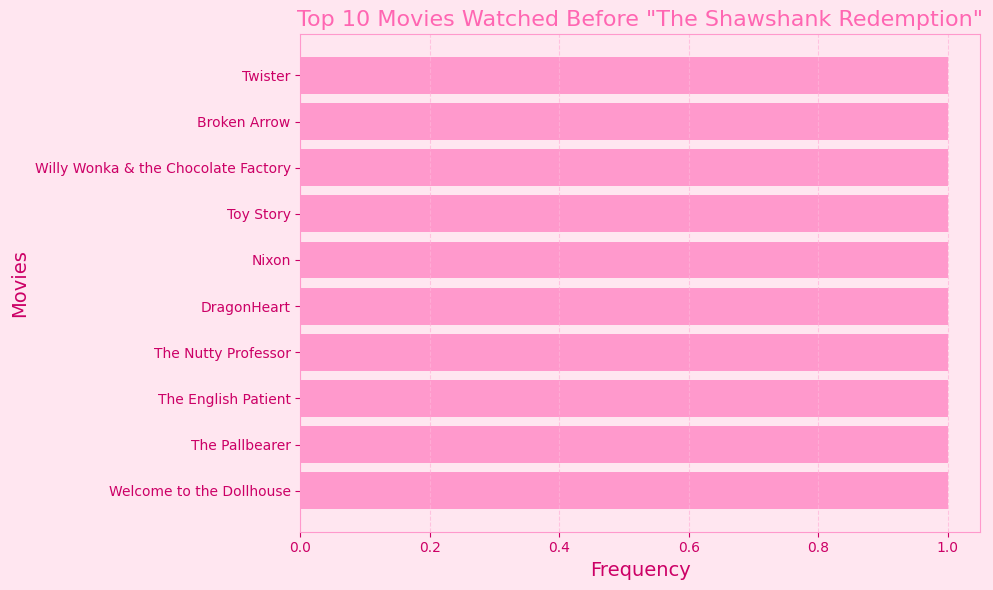

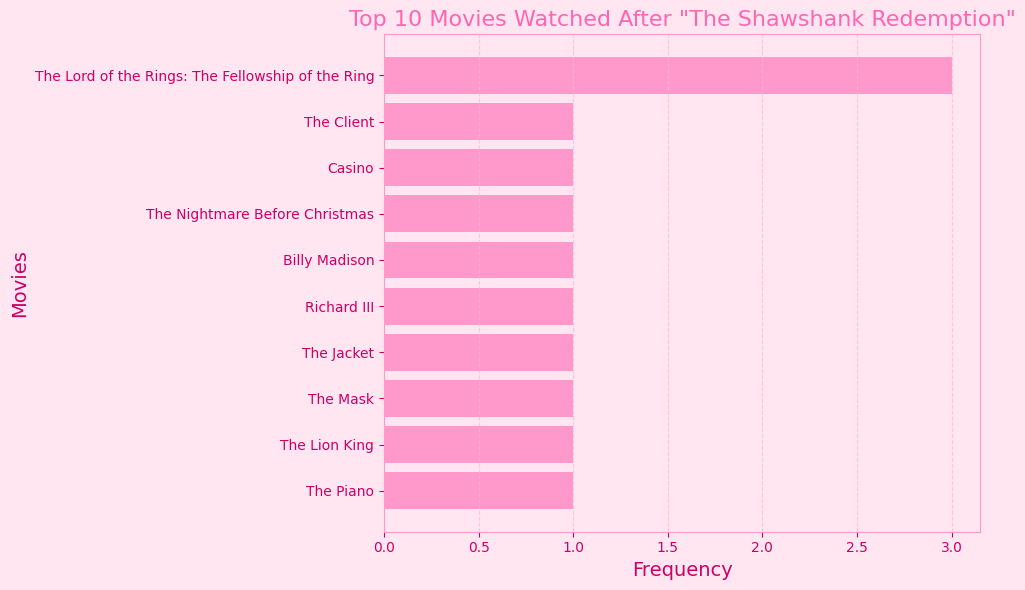

In [66]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Count frequencies of movies in `before` and `after` lists
before_movies = Counter([movie for row in pattern_df['before'] for movie in row])
# Count frequencies of movies in the 'before' list
after_movies = Counter([movie for row in pattern_df['after'] for movie in row])

# Create DataFrames for visualization
before_df = pd.DataFrame(before_movies.items(), columns=['Movie', 'Count']).sort_values(by='Count', ascending=False)
# DataFrame for movies watched before "The Shawshank Redemption"
after_df = pd.DataFrame(after_movies.items(), columns=['Movie', 'Count']).sort_values(by='Count', ascending=False)

# Pink and Pretty Theme Settings
plt.rcParams.update({
    "axes.facecolor": "#ffe6f0",  # Light pink background
    "axes.edgecolor": "#ff99cc",  # Pink edges
    "axes.labelcolor": "#cc0066",  # Bold pink labels
    "xtick.color": "#cc0066",  # Pink tick labels
    "ytick.color": "#cc0066",  # Pink tick labels
    "text.color": "#ff66b2",  # Pink text
    "grid.color": "#ffb3d9"  # Light pink grid lines
})

# Plot top 10 movies watched BEFORE "The Shawshank Redemption"
plt.figure(figsize=(10, 6))
# Create a horizontal bar plot
plt.barh(before_df.head(10)['Movie'], before_df.head(10)['Count'], color="#ff99cc")  # Pastel pink bars
# Add labels and title
plt.xlabel('Frequency', fontsize=14)
# Label the x-axis
plt.ylabel('Movies', fontsize=14)
# Label the y-axis
plt.title('Top 10 Movies Watched Before "The Shawshank Redemption"', fontsize=16)
# Set the title
plt.gca().invert_yaxis()  # Highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for readability
plt.tight_layout()
plt.show()

# Plot top 10 movies watched AFTER "The Shawshank Redemption"
plt.figure(figsize=(10, 6))
plt.barh(after_df.head(10)['Movie'], after_df.head(10)['Count'], color="#ff99cc")  # Pastel pink bars
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Movies', fontsize=14)
plt.title('Top 10 Movies Watched After "The Shawshank Redemption"', fontsize=16)
plt.gca().invert_yaxis()  # Highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for readability
plt.tight_layout()
# Display the plot
plt.show()


# Task 2
The goal of this task is analyze indivdual behavioural, demogrpahic, adn healht-related data, as this is critical to understanding trends.

# Clustering Analysis Using K-Means: Understanding Behavioral Patterns

This analysis employs **K-Means Clustering** to group individuals based on behavioral and demographic characteristics, such as height, weight, alcohol consumption, contacts count, and level of worry. The objective is to identify distinct patterns or groups within the data that share similar traits, offering insights into clustering behaviors for targeted interventions or recommendations.

The analysis involves key steps to determine the optimal number of clusters, visualize patterns within the data, and summarize the characteristics of each cluster.

---

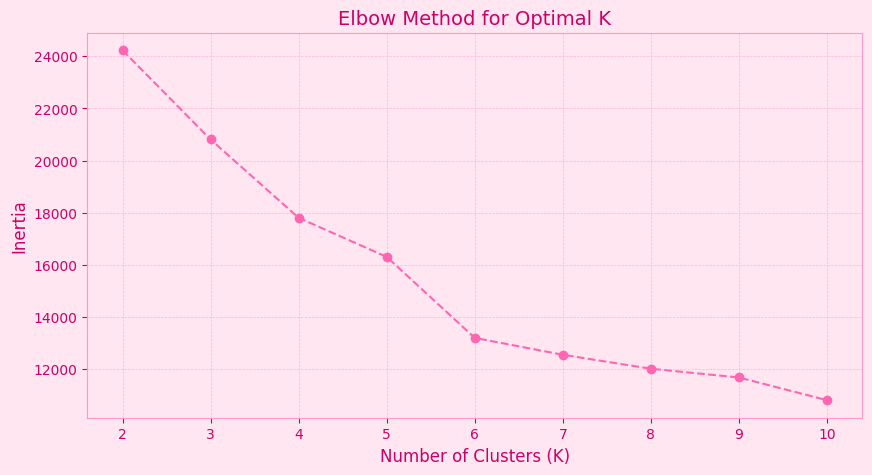

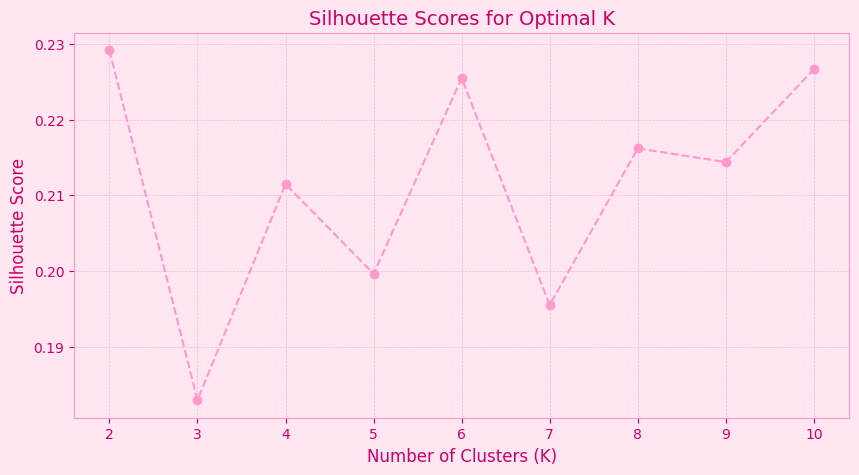

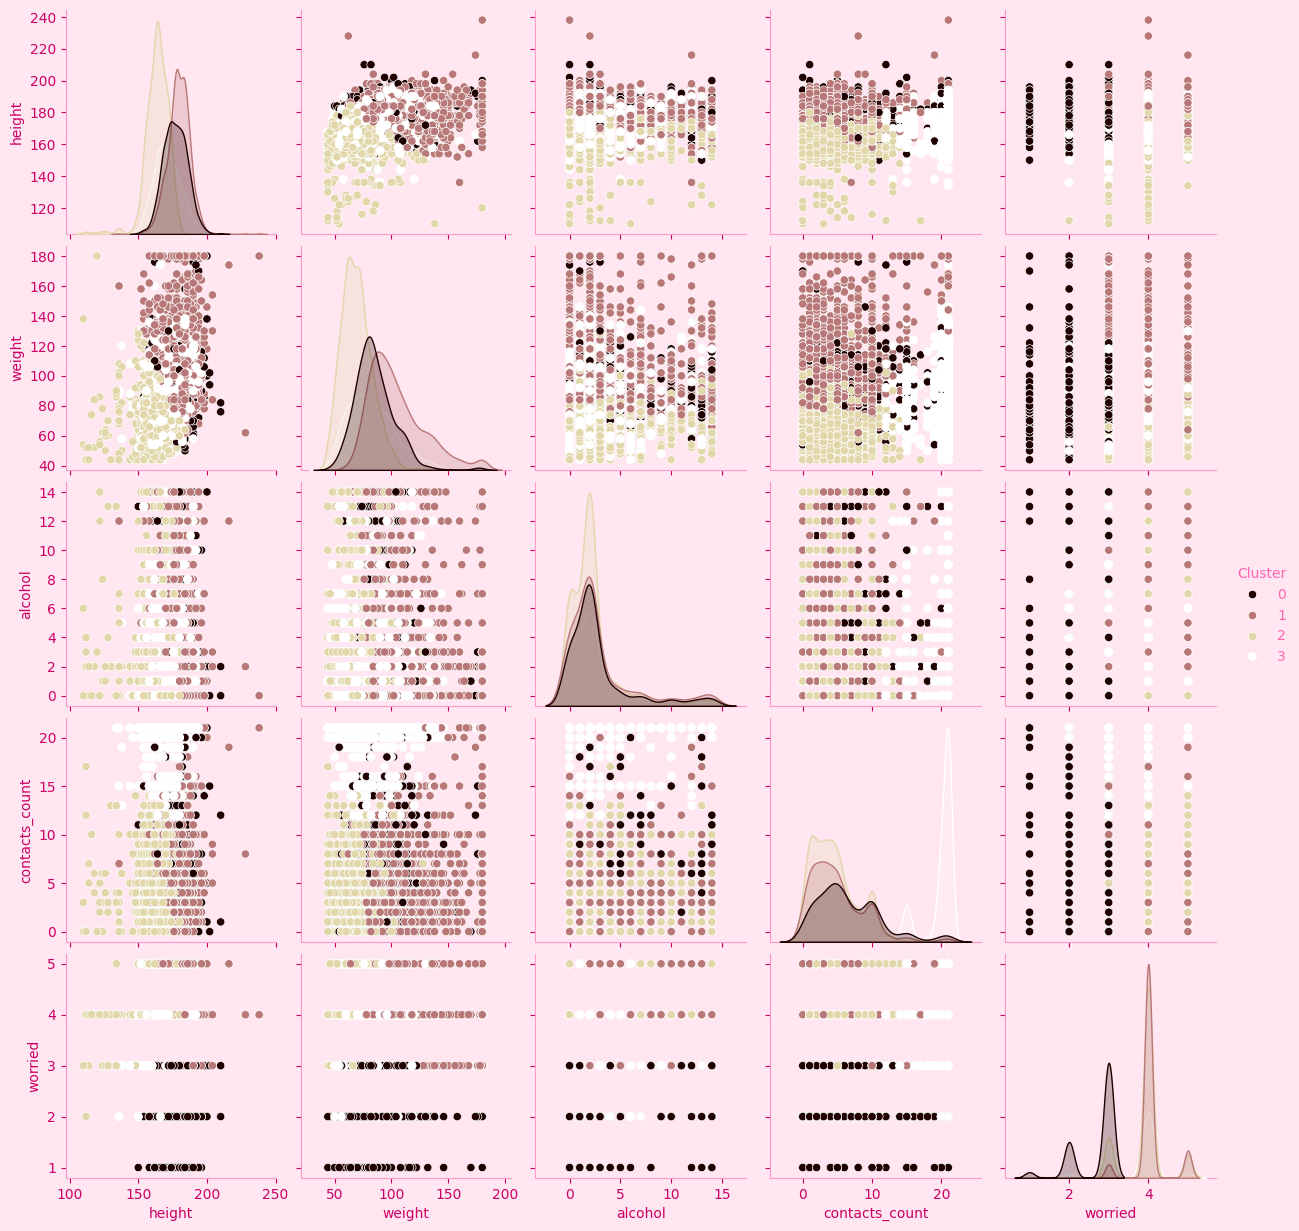


Updated Cluster Summary:
       height      weight   alcohol  contacts_count   worried  Cluster
0  176.806748   85.144172  2.822853        6.622699  2.700920        0
1  179.314767  104.397668  2.994819        4.996114  4.055052        1
2  163.469388   69.310419  2.343179        4.432868  3.931257        2
3  170.606117   82.930491  2.606117       19.710843  3.645968        3


In [67]:
# Re-importing necessary libraries since the session reset the environment
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Set a pink and girly theme for plots
sns.set_palette("pastel")
# Customizing the color palette for the plots
plt.rcParams.update({
    "axes.facecolor": "#ffe6f0",  # Light pink background
    "axes.edgecolor": "#ff99cc",  # Pink borders
    "axes.labelcolor": "#cc0066",  # Bold pink labels
    "xtick.color": "#cc0066",  # Pink tick labels
    "ytick.color": "#cc0066",  # Pink tick labels
    "text.color": "#ff66b2",  # Text color
    "figure.facecolor": "#ffe6f0",  # Pink figure background
    "grid.color": "#ffb3d9"  # Pink grid lines
})

# Reloading the dataset
data = pd.read_csv('D2.csv')

# Preprocessing: Selecting numerical data only and creating an independent copy
numerical_data = data[['height', 'weight', 'alcohol', 'contacts_count', 'worried']].copy()

# Standardizing the numerical variables
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
# List to store inertia values
silhouette_scores = []
# List to store silhouette scores
cluster_range = range(2, 11)  # Testing from 2 to 10 clusters

# Looping over different values of k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(numerical_data_scaled, kmeans.labels_))

# Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
# Create a plot with a specific size
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='#ff66b2')  # Pink line
# Plotting the inertia values
plt.title('Elbow Method for Optimal K', fontsize=14, color='#cc0066')
# Title with pink color
plt.xlabel('Number of Clusters (K)', fontsize=12)
# X-axis label
plt.ylabel('Inertia', fontsize=12)
# Y-axis label
plt.grid(color="#ffb3d9", linestyle="--", linewidth=0.5)
# Add gridlines for better readability
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
# Create a plot with a specific size
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='#ff99cc')  # Light pink line
# Plotting the silhouette scores
plt.title('Silhouette Scores for Optimal K', fontsize=14, color='#cc0066')
# Title with pink color
plt.xlabel('Number of Clusters (K)', fontsize=12)
# X-axis label
plt.ylabel('Silhouette Score', fontsize=12)
# Y-axis label
plt.grid(color="#ffb3d9", linestyle="--", linewidth=0.5)
# Add gridlines for better readability
plt.show()

# Selecting the optimal number of clusters (e.g., from elbow or silhouette analysis)
optimal_k = 4  # Example from analysis
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
# Initialize KMeans with the optimal number of clusters
data['Cluster'] = kmeans_optimal.fit_predict(numerical_data_scaled)

# Adding the Cluster column to the independent copy
numerical_data['Cluster'] = data['Cluster']

# Pairplot to visualize clusters
sns.pairplot(numerical_data, hue='Cluster', diag_kind='kde', palette='pink')  # Pink palette
plt.show()

# Characterize each cluster
cluster_centers = scaler.inverse_transform(kmeans_optimal.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=numerical_data.columns[:-1])
cluster_summary['Cluster'] = range(optimal_k)

# Displaying the cluster summary
print("\nUpdated Cluster Summary:")
print(cluster_summary)

# Optionally save the summary to a CSV or display it in a notebook environment
cluster_summary.to_csv('cluster_summary.csv', index=False)


# Outlier Detection and Removal

Outliers in a dataset can significantly affect the results of statistical analyses and machine learning models. This analysis focuses on detecting and removing outliers in numerical variables using two widely used methods: **Z-Score** and **Interquartile Range (IQR).**

By addressing outliers, the dataset becomes cleaner and more representative of the general population, leading to more reliable results in subsequent analyses.

---

In [68]:
import numpy as np
from scipy.stats import zscore

# Selecting the relevant numerical columns for outlier detection
numerical_cols = ['height', 'weight', 'alcohol', 'contacts_count', 'worried']

# Function to detect outliers using Z-score
def detect_outliers_zscore(data, columns, threshold=3):
    """
    Detects outliers in the given columns using the Z-score method.

    Parameters:
    - data: DataFrame containing the dataset
    - columns: List of columns to check for outliers
    - threshold: Z-score threshold for detecting outliers (default is 3)

    Returns:
    - A set of indices corresponding to rows with outliers
    """
    outlier_indices = set()
    for col in columns:
        z_scores = zscore(data[col].dropna())  # Compute Z-scores, avoiding NaN issues
        # Identify indices where Z-score exceeds the threshold
        outlier_indices.update(data[(z_scores > threshold) | (z_scores < -threshold)].index)
    return outlier_indices

# Function to detect outliers using IQR
def detect_outliers_iqr(data, columns):
    """
    Detects outliers in the given columns using the IQR method.

    Parameters:
    - data: DataFrame containing the dataset
    - columns: List of columns to check for outliers

    Returns:
    - A set of indices corresponding to rows with outliers
    """
    outlier_indices = set()
    for col in columns:
        Q1 = data[col].quantile(0.25)  # First quartile
        Q3 = data[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile Range
        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify indices where values fall outside the bounds
        outlier_indices.update(data[(data[col] < lower_bound) | (data[col] > upper_bound)].index)
    return outlier_indices

# Detecting outliers using both methods
zscore_outliers = detect_outliers_zscore(data, numerical_cols)
iqr_outliers = detect_outliers_iqr(data, numerical_cols)

# Combine all outliers detected by both methods
all_outliers = set(zscore_outliers).union(iqr_outliers)

# Remove outliers from the dataset
data_cleaned = data.drop(index=all_outliers)

# Displaying the results
outlier_count = len(all_outliers)
original_shape = data.shape
cleaned_shape = data_cleaned.shape

# Print the results with descriptions
print(f"Original dataset shape (before outlier removal): {original_shape}")
print(f"Cleaned dataset shape (after outlier removal): {cleaned_shape}")
print(f"Number of outliers detected and removed: {outlier_count}")

# Display column-level outlier counts for better understanding
for col in numerical_cols:
    z_outliers_col = detect_outliers_zscore(data, [col])
    iqr_outliers_col = detect_outliers_iqr(data, [col])
    col_outliers = set(z_outliers_col).union(iqr_outliers_col)
    print(f"Number of outliers in column '{col}': {len(col_outliers)}")


Original dataset shape (before outlier removal): (5789, 14)
Cleaned dataset shape (after outlier removal): (4354, 14)
Number of outliers detected and removed: 1435
Number of outliers in column 'height': 51
Number of outliers in column 'weight': 170
Number of outliers in column 'alcohol': 641
Number of outliers in column 'contacts_count': 668
Number of outliers in column 'worried': 46


# Post-Outlier Removal Analysis and Visualization

After identifying and removing outliers from the dataset, it is important to assess the distribution of the cleaned data and prepare it for further analysis. This step involves summarizing the cleaned dataset, visualizing the numerical columns to confirm the absence of extreme values, and standardizing the data for consistency in subsequent statistical or machine learning tasks.

---
## Explaining code
---

### Key Steps and Processes:

1. **Preparation:**
   - The dataset is loaded, and the relevant numerical columns are selected for outlier detection. These are columns like height, weight, and alcohol consumption, where extreme values might distort results. (Han et al., 2011).

2. **Z-Score Method:**
   - The Z-score method identifies how many standard deviations a data point is from the mean. If a value's Z-score is beyond a specified threshold (default is 3), it is considered an outlier.
   - The method loops through each column, calculates Z-scores, and records indices of rows with extreme values.

3. **IQR Method:**
   - The IQR method calculates the range between the first and third quartiles (Q1 and Q3). Data points falling below Q1 minus 1.5 times the IQR or above Q3 plus 1.5 times the IQR are identified as outliers.
   - In this method we iterate through the numerical columns and capture indices of outliers using these bounds.

4. **Combining Results:**
   - The indices of outliers detected by both methods are combined into a single set. This ensures no outliers are missed, whether they are extreme deviations or fall outside the interquartile range. 

5. **Outlier Removal:**
   - Rows corresponding to the outlier indices are removed from the dataset to create a "cleaned" version, helping to elimante noise.


            height       weight      alcohol  contacts_count      worried  \
count  4354.000000  4354.000000  4354.000000     4354.000000  4354.000000   
mean    172.062931    82.097841     1.717960        6.228525     3.654341   
std       9.980486    19.529560     1.348324        5.094458     0.696680   
min     144.000000    44.000000     0.000000        0.000000     2.000000   
25%     164.000000    68.000000     1.000000        3.000000     3.000000   
50%     172.000000    80.000000     2.000000        5.000000     4.000000   
75%     180.000000    94.000000     2.000000       10.000000     4.000000   
max     204.000000   138.000000     6.000000       20.000000     5.000000   

       covid19_positive      Cluster  
count       4354.000000  4354.000000  
mean           0.360129     1.322232  
std            0.480093     0.947618  
min            0.000000     0.000000  
25%            0.000000     1.000000  
50%            0.000000     1.000000  
75%            1.000000     2.000

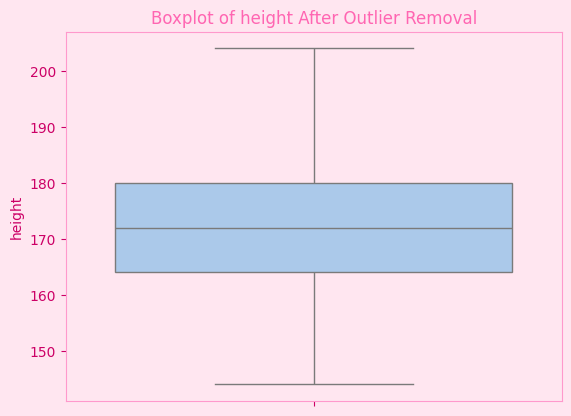

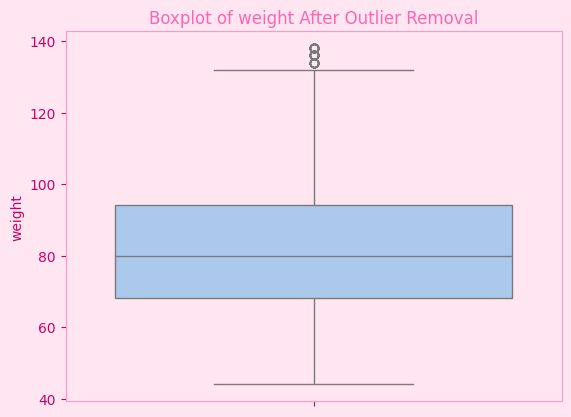

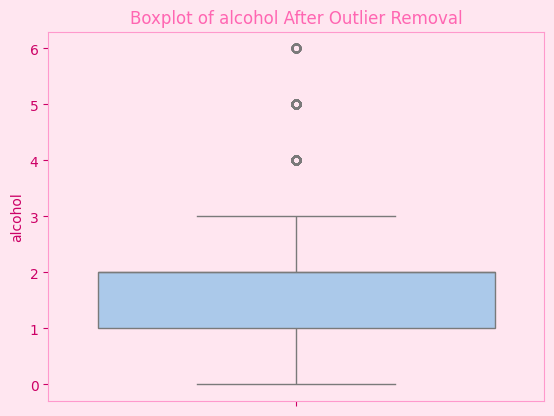

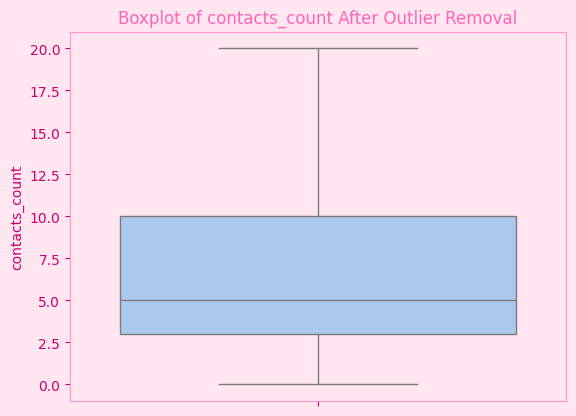

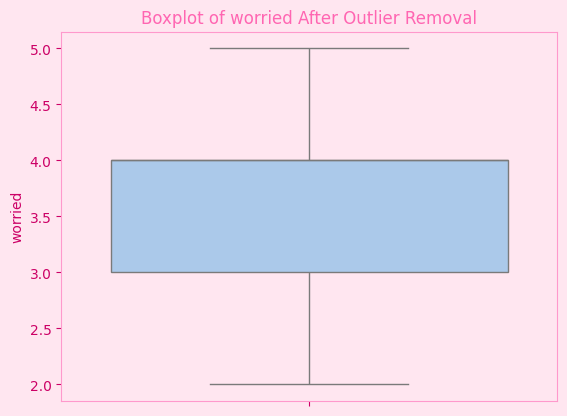

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Print summary statistics for the cleaned dataset
print(data_cleaned.describe())

# Loop through each numerical column to create boxplots
for col in numerical_cols:
    sns.boxplot(data_cleaned[col])  # Create a boxplot for the current column
    plt.title(f"Boxplot of {col} After Outlier Removal")  # Set the title of the plot
    plt.show()  # Display the plot

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns and transform the data
scaled_data = scaler.fit_transform(data_cleaned[numerical_cols])

In [70]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=numerical_cols)
print("Cluster Summary:")
print(cluster_summary)

data_cleaned.to_csv("cleaned_data_with_clusters.csv", index=False)


Cluster Summary:
       height      weight   alcohol  contacts_count   worried
0  165.686443   69.243501  1.383296        4.283655  2.897996
1  178.180456   85.015049  1.179619        3.612124  4.111891
2  171.306793   81.294745  5.902849        3.255317  3.654434
3  180.798856   87.046229  1.305048        4.617418  2.828812
4  173.863732   83.860377  3.405640        3.911559  4.057194
5  171.718850   78.652603  1.350815       14.833524  2.754424
6  162.459233   68.487071  1.294729        3.634527  4.105377
7  176.421519  127.378231  1.376676        5.735071  3.844661
8  176.345919   89.570836  5.158029       13.858567  3.291545
9  170.901272   80.011578  1.356890       15.122523  4.071792


# Clustering Analysis: Including and Excluding "Age"

This analysis explores clustering with **K-Means** to uncover patterns in user data. The focus is on comparing the clustering results with and without considering the **"age"** variable. By examining these scenarios, we can determine the impact of including age on cluster formation and assess the distribution of individuals across clusters.

The study includes visualizing the age distribution, standardizing the data, performing clustering, and analyzing the resulting cluster centers.


C:\Users\ejfur\AppData\Local\Temp\ipykernel_27792\3228916914.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="age", data=data, palette="pastel", order=sorted(data['age'].unique()))


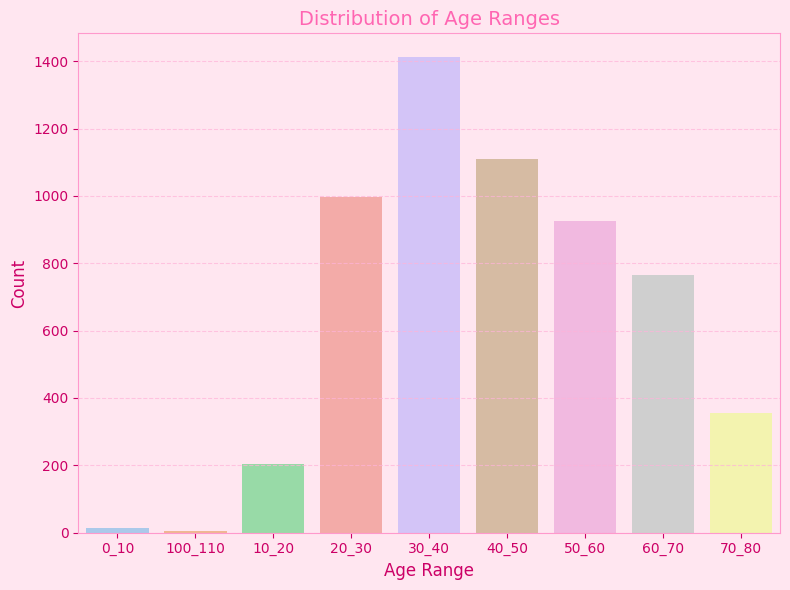

C:\Users\ejfur\AppData\Local\Temp\ipykernel_27792\3228916914.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster_without_age", data=data, palette="pastel")  # Create a countplot for cluster labels


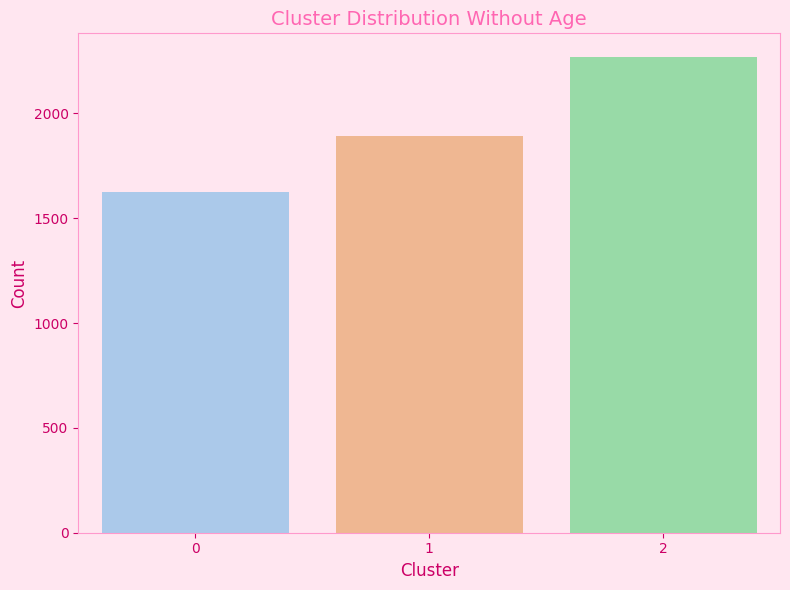


Cluster Centers Without Age:
       height      weight   alcohol  contacts_count   worried
0  175.543946   84.149969  2.838353        9.302397  2.734481
1  179.111697  103.667018  2.884089        7.639094  4.043203
2  163.568021   69.383392  2.379859        7.172261  3.937279


In [71]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Plotting a bar chart for age distribution in the dataset
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.countplot(x="age", data=data, palette="pastel", order=sorted(data['age'].unique()))  
# Create a countplot for 'age' with a pastel color palette and sorted unique values
plt.title("Distribution of Age Ranges", fontsize=14)  # Add a title with specific font size
plt.xlabel("Age Range", fontsize=12)  # Label the x-axis
plt.ylabel("Count", fontsize=12)  # Label the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to the y-axis for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()  # Display the plot

# Preparing data for clustering (excluding 'age')
numerical_data_without_age = data[['height', 'weight', 'alcohol', 'contacts_count', 'worried']]
# Select only numerical columns excluding 'age' for clustering

# Standardizing the data for clustering
scaler = StandardScaler()  # Initialize a StandardScaler for data
numerical_data_scaled = scaler.fit_transform(numerical_data_without_age)  # Scale numerical data

# Performing K-Means clustering on the scaled data
kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize K-Means with 3 clusters and a fixed random state
data['Cluster_without_age'] = kmeans.fit_predict(numerical_data_scaled)
# Assign cluster labels to the original dataset for data excluding 'age'

# Extracting cluster centers and reversing the scaling for interpretation
cluster_centers_without_age = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),  # Inverse transform to original scale
    columns=['height', 'weight', 'alcohol', 'contacts_count', 'worried']  # Add appropriate column names
)

# Plotting the distribution of clusters (without 'age')
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.countplot(x="Cluster_without_age", data=data, palette="pastel")  # Create a countplot for cluster labels
plt.title("Cluster Distribution Without Age", fontsize=14)  # Add a title
plt.xlabel("Cluster", fontsize=12)  # Label the x-axis
plt.ylabel("Count", fontsize=12)  # Label the y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()  # Display the plot

# Printing cluster centers for analysis
print("\nCluster Centers Without Age:")  # Print a title for the cluster centers without age
print(cluster_centers_without_age)  # Print the cluster center values for data excluding 'age'


C:\Users\ejfur\AppData\Local\Temp\ipykernel_27792\2567354220.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette="pastel")


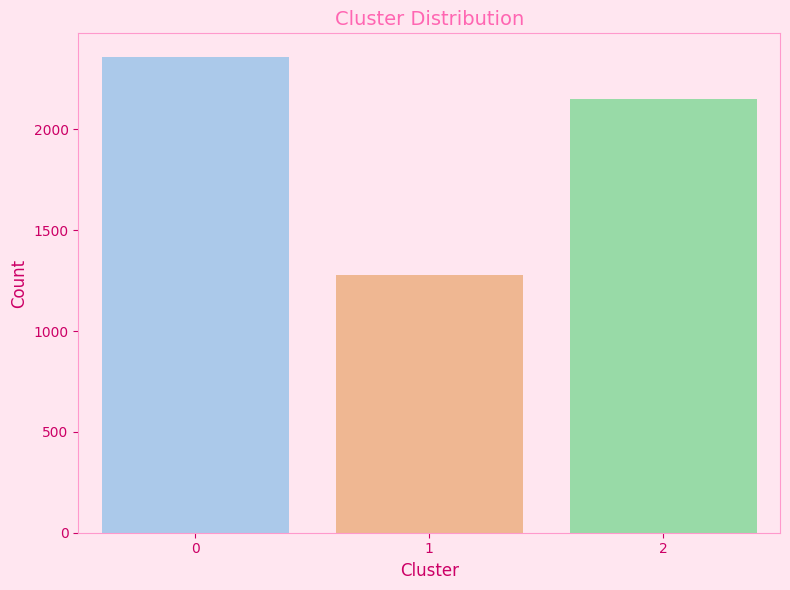


Cluster Centers:
       height      weight   alcohol  contacts_count   worried        age
0  164.791684   70.598218  2.458634        4.613916  3.776411  39.641493
1  171.737295   83.853010  2.639562       18.867866  3.450352  37.259578
2  180.128193  100.839758  2.930330        5.046447  3.587088  44.289364


In [72]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd

# Load dataset
data = pd.read_csv('D2.csv')

# Process age column: Convert ranges to numeric averages for better clustering
age_mapping = {'20_30': 25, '30_40': 35, '40_50': 45, '50_60': 55, '70_80': 75}
data['age'] = data['age'].map(age_mapping)

# Encoding other categorical variables
categorical_cols = ['gender', 'blood_type', 'insurance', 'income', 'smoking', 'working']
encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])  # Encode categories as integers

# Selecting numerical features for clustering
features = ['height', 'weight', 'alcohol', 'contacts_count', 'worried', 'age']
numerical_data = data[features]

# Handling missing values without inplace
numerical_data = numerical_data.apply(lambda col: col.fillna(col.median()), axis=0)

# Standardizing the data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Performing K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(numerical_data_scaled)

# Extracting cluster centers
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
)

# Visualizing clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=data, palette="pastel")
plt.title("Cluster Distribution", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

# Printing cluster centers
print("\nCluster Centers:")
print(cluster_centers)


## The Z-Score Method and IQR Method
- **Box plot and IQR**: IQR is a measure of quartiles.
- **Z-score**: The Z-score method standardizes the data by calculating the number of standard deviations a data point deviates from the mean. It detects outliers based on their deviation from the mean.


# Task 3

# Decision Tree Analysis for COVID-19 Positivity Prediction

This analysis builds and evaluates **Decision Tree Classifiers** to predict COVID-19 positivity based on key variables such as height, weight, alcohol consumption, contacts count, and worry level. The parameter grid is designed to optimize the model through **GridSearchCV** by balancing complexity and performance:

---
## Explanation of Code
---

### 1. **Default Model**
   - **Code**: 
     ```python
     default_tree = DecisionTreeClassifier(random_state=42)
     default_tree.fit(X_train, y_train)
     ```
   - **Description**: 
     - The default model uses the default settings of the `DecisionTreeClassifier`. It does not impose any restrictions on the tree's growth (e.g., depth, number of leaf nodes, etc.), allowing the tree to grow fully until all leaves are pure or contain fewer than `min_samples_split`.
   - **Purpose**: 
     - To serve as a baseline to compare against tuned models.
   - **Limitations**:
     - It is likely to overfit the training data, especially for complex datasets, as the tree grows without constraints, capturing even minor noise.

---

### 2. **Tuned Model**
   - **Code**:
     ```python
     param_grid = {
         'max_depth': [3, 5, 10, None], 
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4],
         'max_leaf_nodes': [15]
     }
     grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
     grid_search.fit(X_train, y_train)
     tuned_tree = grid_search.best_estimator_
     ```
   - **Description**:
     - This model is optimized using **GridSearchCV**, which systematically explores combinations of hyperparameters to find the best configuration based on cross-validation accuracy.
     - The parameters tuned are:
       - `max_depth`: Controls how deep the tree can grow, preventing overfitting.
       - `min_samples_split`: Ensures a minimum number of samples required to split a node, reducing noisy splits.
       - `min_samples_leaf`: Ensures leaf nodes have a minimum number of samples, improving generalization.  (Han et al., 2011).
       - `max_leaf_nodes`: Limits the total number of leaf nodes to ensure simplicity.
   - **Purpose**:
     - To balance complexity and performance by preventing overfitting (Han et al., 2011).
   - **Advantages**:
     - Produces a model that generalizes well to unseen data by using cross-validation during tuning. (Tan et al., 2019).

---

### 3. **Reduced Model (Limited to 15 Leaf Nodes)**
   - **Code**:
     ```python
     'max_leaf_nodes': [15]
     ```
   - **Description**:
     - By explicitly setting `max_leaf_nodes` to 15, the tree's size is strictly limited, regardless of other factors like depth or data distribution.
     - This constraint simplifies the model and ensures it remains interpretable, as it limits the number of decision points in the tree.(Han et al., 2011).
   - **Purpose**:
     - To enforce simplicity and interpretability, making the tree easier to understand and avoiding overfitting to complex data.
   - **Trade-offs**:
     - This strict limit might cause the model to underfit if the dataset requires a more complex tree to capture meaningful patterns.
     - While this restriction might reduce accuracy on the training set, it may improve generalization for simpler datasets.  (Tan et al., 2019).

---

### Why Code Them Differently?
1. **Default Model**:
   - Uses no constraints to create a baseline, demonstrating the raw power of decision trees to fit the data without any limits.
2. **Tuned Model**:
   - Balances complexity and generalization by exploring multiple configurations through cross-validation, selecting the best-performing setup.
3. **Reduced Model**:
   - Specifically limits the tree size to simplify the structure, prioritizing interpretability and preventing over-complexity.


==== Default Decision Tree ====
Training Accuracy: 0.99
Test Accuracy: 0.57
Tree Size (Number of Nodes): 3207
First Split Variable: worried
Top 5 Important Variables:
weight            0.322089
height            0.255952
contacts_count    0.219035
alcohol           0.145292
worried           0.057632
dtype: float64

==== Tuned Decision Tree ====
Training Accuracy: 0.66
Test Accuracy: 0.65
Tree Size (Number of Nodes): 29
First Split Variable: worried
Top 5 Important Variables:
worried           0.372136
contacts_count    0.300508
weight            0.207068
height            0.096306
alcohol           0.023982
dtype: float64

==== ROC Curve Comparison ====


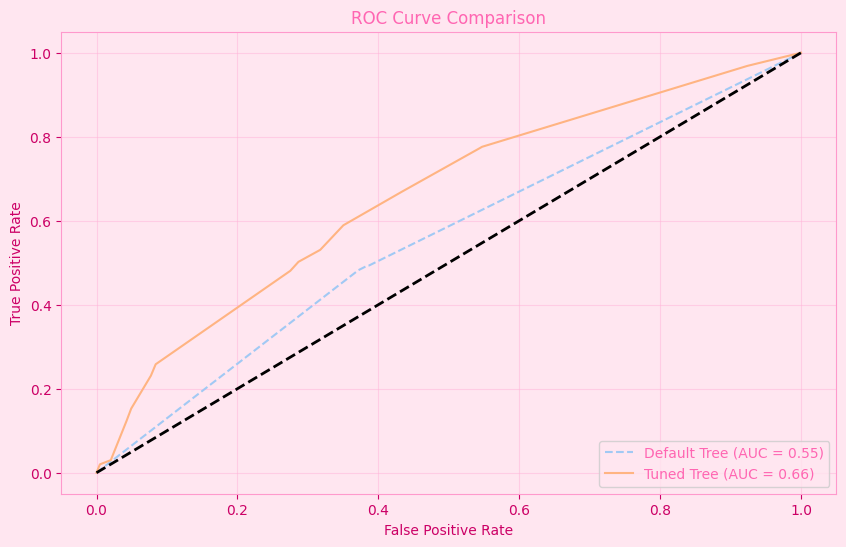

==== High-Risk (COVID Positive) Individuals ====
      height  weight  alcohol  contacts_count  worried
3150     164      60      8.0            21.0      4.0
5286     160      66      1.0            21.0      4.0
4032     170     116      0.0             2.0      3.0
5311     168      92      2.0            21.0      4.0
1818     158     134      0.0            12.0      4.0
893      176     110      2.0             4.0      3.0
2699     184     136      2.0             1.0      4.0
4820     186     138      0.0             0.0      4.0
875      194      94      2.0            21.0      4.0
3096     174      92      0.0            21.0      4.0
5113     172     104      1.0            21.0      4.0
5531     182     116      2.0            21.0      4.0
5450     136     102      2.0             1.0      4.0
3252     164     100      2.0             1.0      4.0
5406     174      74      0.0            21.0      4.0
3852     172     122      3.0             5.0      4.0
2455     182    

In [73]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier  # For creating decision tree models
from sklearn.metrics import accuracy_score, roc_curve, auc  # For evaluating model performance
import matplotlib.pyplot as plt  # For plotting visualizations

# ANSI escape codes for colors
pink = "\033[95m"  # Define pink color for terminal text
reset = "\033[0m"  # Reset terminal text to default color

# Prepare the features (X) and target variable (y)
X = data[['height', 'weight', 'alcohol', 'contacts_count', 'worried']]  # Features (independent variables)
y = data['covid19_positive']  # Target variable (dependent variable)

# Split the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # Use stratified split to maintain class distribution
)

# ---- Build and Evaluate Default Decision Tree ----
print(f"{pink}==== Default Decision Tree ===={reset}")

# Initialize the decision tree classifier with default settings
default_tree = DecisionTreeClassifier(random_state=42)

# Fit the default decision tree on the training data
default_tree.fit(X_train, y_train)

# Predictions for training and test datasets
y_train_pred = default_tree.predict(X_train)  # Predict on training data
y_test_pred = default_tree.predict(X_test)  # Predict on test data

# Evaluate accuracy
train_accuracy_default = accuracy_score(y_train, y_train_pred)  # Training accuracy
test_accuracy_default = accuracy_score(y_test, y_test_pred)  # Test accuracy

# Extract tree details
tree_size_default = default_tree.tree_.node_count  # Number of nodes in the tree
first_split_variable_default = X.columns[default_tree.tree_.feature[0]]  # First split variable
feature_importance_default = pd.Series(
    default_tree.feature_importances_, index=X.columns
).sort_values(ascending=False).head(5)  # Top 5 features by importance

# Print results
print(f"Training Accuracy: {train_accuracy_default:.2f}")
print(f"Test Accuracy: {test_accuracy_default:.2f}")
print(f"Tree Size (Number of Nodes): {tree_size_default}")
print(f"First Split Variable: {first_split_variable_default}")
print(f"Top 5 Important Variables:\n{feature_importance_default}\n")

# ---- Tune Decision Tree with GridSearchCV ----
print(f"{pink}==== Tuned Decision Tree ===={reset}")

#
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],  # Different tree depth limits
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_leaf_nodes': [15]  # Limit the tree to a maximum of 15 nodes
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),  # Base model
    param_grid,  # Hyperparameter grid
    scoring='accuracy',  # Evaluation metric
    cv=5  # 5-fold cross-validation
)
grid_search.fit(X_train, y_train)  # Fit GridSearchCV on training data

# Get the best estimator from GridSearchCV
tuned_tree = grid_search.best_estimator_

# Predictions for training and test datasets with tuned model
y_train_pred_tuned = tuned_tree.predict(X_train)
y_test_pred_tuned = tuned_tree.predict(X_test)

# Evaluate accuracy of tuned model
train_accuracy_tuned = accuracy_score(y_train, y_train_pred_tuned)  # Training accuracy
test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)  # Test accuracy

# Extract tree details for tuned model
tree_size_tuned = tuned_tree.tree_.node_count  # Number of nodes in tuned tree
first_split_variable_tuned = X.columns[tuned_tree.tree_.feature[0]]  # First split variable in tuned tree
feature_importance_tuned = pd.Series(
    tuned_tree.feature_importances_, index=X.columns
).sort_values(ascending=False).head(5)  # Top 5 features by importance

# Print results
print(f"Training Accuracy: {train_accuracy_tuned:.2f}")
print(f"Test Accuracy: {test_accuracy_tuned:.2f}")
print(f"Tree Size (Number of Nodes): {tree_size_tuned}")
print(f"First Split Variable: {first_split_variable_tuned}")
print(f"Top 5 Important Variables:\n{feature_importance_tuned}\n")

# ---- Plot ROC Curves for Both Models ----
print(f"{pink}==== ROC Curve Comparison ===={reset}")

# Compute ROC curves and AUC scores for default and tuned models
fpr_default, tpr_default, _ = roc_curve(y_test, default_tree.predict_proba(X_test)[:, 1])  # Default model
roc_auc_default = auc(fpr_default, tpr_default)

fpr_tuned, tpr_tuned, _ = roc_curve(y_test, tuned_tree.predict_proba(X_test)[:, 1])  # Tuned model
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_default, tpr_default, label=f'Default Tree (AUC = {roc_auc_default:.2f})', linestyle='--')  # Default
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned Tree (AUC = {roc_auc_tuned:.2f})', linestyle='-')  # Tuned
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()

# ---- Identify High-Risk Individuals ----
print(f"{pink}==== High-Risk (COVID Positive) Individuals ===={reset}")

# Extract high-risk individuals (predicted COVID positive cases from the tuned model)
high_risk_individuals = X_test[y_test_pred_tuned == 1]
print(high_risk_individuals)


# Logistic Regression Analysis for COVID-19 Positivity Prediction

This analysis applies **Logistic Regression** to predict COVID-19 positivity, using a combination of preprocessing, hyperparameter tuning, and feature selection techniques. The objective is to compare three models:
1. A **default logistic regression model**.
2. A **tuned model** optimized using grid search with cross-validation.
3. A **reduced model** with selected features identified through **Recursive Feature Elimination (RFE)**.

The evaluation includes metrics such as accuracy and AUC (Area Under the ROC Curve) to assess model performance, as well as feature importance to interpret the most significant predictors.


---
## Explanation of Code
---

### **1. Loading and Preparing the Dataset**
- **Steps**:
  - **Read the data**: Load the dataset from a CSV file using `pd.read_csv()`.
  - **Inspect data**: Use `.info()` to understand the structure, identify missing values, and confirm data types.
  - **Separate features and target variable**: Separate independent variables (`X`) and the dependent variable (`y`).
  - **Categorical vs. numerical split**: Identify columns based on their data types using `select_dtypes()`.

- **Why?**:
  - Splitting the dataset into features and target ensures clarity in preprocessing.
  - Separating categorical and numerical columns is crucial for applying the right transformations in the preprocessing pipeline.

---

### **2. Preprocessing the Data**
- **Steps**:
  - **StandardScaler**: Standardizes numerical columns to have mean 0 and variance 1, ensuring uniform scaling.
  - **OneHotEncoder**: Converts categorical columns into numerical representations using one-hot encoding.
  - **ColumnTransformer**: Combines both transformations into a single preprocessing step.
  - **Train-test split**: Splits the data into 70% training and 30% test sets using `train_test_split()`.

- **Why?**:
  - Preprocessing ensures all features are on comparable scales, which is critical for models like logistic regression that rely on feature magnitudes.
  - Using a unified pipeline with `ColumnTransformer` makes the code modular and reusable.

---

### **3. Default Logistic Regression Model**
- **Steps**:
  - Train a logistic regression model with default settings (`LogisticRegression(random_state=42)`).
  - Predict on the test set and evaluate accuracy and ROC AUC.
  - Extract feature importance using the model’s coefficients and rank the top 5 variables by absolute coefficient value.

- **Why?**:
  - The default model serves as a baseline for comparison against tuned and reduced models.
  - Feature importance highlights the most influential variables, offering insights into model decision-making. (Han et al., 2011).

---

### **4. Tuned Logistic Regression Model**
- **Steps**:
  - Use `GridSearchCV` to search for the best hyperparameters:
    - `C`: Regularization strength (controls overfitting/underfitting).
    - `penalty`: Type of regularization (`l1` for LASSO, `l2` for Ridge).
    - `solver`: Algorithm used for optimization (`liblinear` works well with small datasets and `l1` penalty).
  - Evaluate the tuned model using accuracy and ROC AUC on the test set.
  - Extract and rank feature importance similarly to the default model.

- **Why?**:
  - Hyperparameter tuning ensures the model is optimized for both regularization and solver compatibility. (Han et al., 2011).
  - Cross-validation (`cv=5`) evaluates the model's robustness by splitting the training data into 5 folds, reducing the risk of overfitting to a single train-test split  (Tan et al., 2019).

---

### **5. Reduced Logistic Regression Model**
- **Steps**:
  - Use Recursive Feature Elimination (RFE) to select the 5 most important features.
  - Train a logistic regression model with only these features, using the best parameters from the tuned model.
  - Evaluate the reduced model for accuracy and ROC AUC.
  - Extract and rank the importance of the selected features.

- **Why?**:
  - RFE systematically removes the least important features, simplifying the model while retaining predictive power. (Han et al., 2011).
  - A reduced feature set improves interpretability and reduces overfitting, especially in datasets with irrelevant or redundant variables. 

---

### **6. Evaluating and Comparing Models**
- **Steps**:
  - Compute ROC curves and AUC scores for all three models.
  - Plot the ROC curves to visualize model performance in terms of true positive rate (TPR) vs. false positive rate (FPR).
  - Identify the best model based on ROC AUC.

- **Why?**:
  - ROC AUC is a robust metric for binary classification, considering both sensitivity and specificity (Tan et al., 2019).
  - Visual comparison of ROC curves highlights the trade-offs between different models.

---

### **Key Design Choices**
1. **GridSearchCV**:
   - Allows systematic tuning of hyperparameters with cross-validation, ensuring that the tuned model generalizes well.

2. **RFE**:
   - Reduces dimensionality and highlights the core features driving the model, improving interpretability and performance.

3. **StandardScaler and OneHotEncoder**:
   - Ensures all features are treated appropriately, avoiding biases due to scaling differences.

4. **ROC AUC as Evaluation Metric**:
   - Accounts for imbalanced datasets, focusing on the quality of classification across different thresholds.

5. **Pipeline and Modularity**:
   - Encapsulates preprocessing and feature selection steps, making the code easier to extend or modify.

---

### Final Decision
The **best model** is selected based on the highest ROC AUC score, ensuring that it performs well on both sensitivity and specificity. The final print statement provides a clear summary of the optimal model for actionable insights.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5789 non-null   object 
 1   age               5789 non-null   object 
 2   height            5789 non-null   int64  
 3   weight            5789 non-null   int64  
 4   blood_type        5789 non-null   object 
 5   insurance         5789 non-null   object 
 6   income            5789 non-null   object 
 7   smoking           5789 non-null   object 
 8   alcohol           5789 non-null   float64
 9   contacts_count    5789 non-null   float64
 10  working           5789 non-null   object 
 11  worried           5789 non-null   float64
 12  covid19_positive  5789 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 588.1+ KB

========== Default Logistic Regression Model ==========
Training Accuracy: 0.6893
Test Accuracy: 0.6816
ROC A

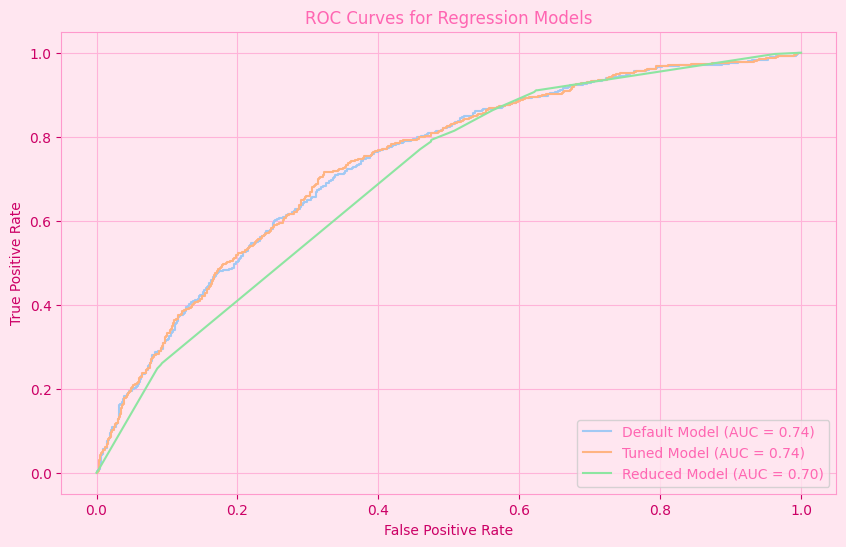


========== Best Model ==========
The best model is the Tuned Logistic Regression Model with a ROC AUC of 0.7385


In [74]:
from sklearn.model_selection import train_test_split  # For splitting dataset into training and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For feature scaling and encoding categorical variables
from sklearn.compose import ColumnTransformer  # For preprocessing pipelines that handle multiple types of data
from sklearn.pipeline import Pipeline  # For chaining preprocessing and modeling steps
from sklearn.linear_model import LogisticRegression  # Logistic Regression algorithm
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc  # For evaluating model performance
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
from sklearn.feature_selection import RFE  # For recursive feature elimination
import numpy as np  # For numerical operations
import pandas as pd  # For handling datasets
import matplotlib.pyplot as plt  # For data visualization

# =============================================
# Load and Prepare Dataset
# =============================================
file_path = 'D2.csv'  # Path to the dataset
data = pd.read_csv(file_path)  # Load the dataset into a pandas DataFrame

print("Dataset Info:")  # Display dataset summary
data.info()  # Show information about the dataset (columns, data types, non-null counts)

# Separate features (X) and target variable (y)
X = data.drop(columns='covid19_positive')  # Drop the target column to get features
y = data['covid19_positive']  # Set the target column

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns  # Columns with categorical data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns  # Columns with numerical data

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical columns
    ]
)

# Preprocess data and split into training and test sets
X_preprocessed = preprocessor.fit_transform(X)  # Apply preprocessing to features
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)  # Split data

# =============================================
# Default Logistic Regression Model
# =============================================
print("\n========== Default Logistic Regression Model ==========")

# Initialize the default Logistic Regression model
default_model = LogisticRegression(random_state=42, max_iter=1000)
default_model.fit(X_train, y_train)  # Train the model using the training set

# Evaluate the default model
y_pred_default = default_model.predict(X_test)  # Predict on the test set
default_accuracy = accuracy_score(y_test, y_pred_default)  # Calculate test accuracy
default_train_accuracy = accuracy_score(y_train, default_model.predict(X_train))  # Calculate training accuracy
default_roc_auc = roc_auc_score(y_test, default_model.predict_proba(X_test)[:, 1])  # Calculate ROC AUC score

# Get feature names and their coefficients
numerical_feature_names = numerical_cols.tolist()  # List of numerical feature names
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()  # List of categorical feature names
all_feature_names = numerical_feature_names + categorical_feature_names  # Combine feature names

coefficients_default = default_model.coef_[0]  # Get coefficients of the default model
importance_default = {name: coef for name, coef in zip(all_feature_names, coefficients_default)}  # Map features to coefficients
sorted_importance_default = sorted(importance_default.items(), key=lambda x: abs(x[1]), reverse=True)  # Sort by importance
top_5_default = sorted_importance_default[:5]  # Get the top 5 most important features

# Display results for the default model
print(f"Training Accuracy: {default_train_accuracy:.4f}")
print(f"Test Accuracy: {default_accuracy:.4f}")
print(f"ROC AUC: {default_roc_auc:.4f}")
print("Top 5 Variables (Default Model):")
for var, coef in top_5_default:
    print(f"  {var}: {coef:.4f}")

# =============================================
# Tuned Logistic Regression Model
# =============================================
print("\n========== Tuned Logistic Regression Model ==========")

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization types
    'solver': ['liblinear']  # Solver compatible with l1 and l2
}

# Grid search for best hyperparameters
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                           param_grid, cv=5, scoring='roc_auc')  # Cross-validation on ROC AUC
grid_search.fit(X_train, y_train)  # Fit grid search to training data

tuned_model = grid_search.best_estimator_  # Get the best model from grid search

# Evaluate the tuned model
y_pred_tuned = tuned_model.predict(X_test)  # Predict on the test set
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)  # Calculate test accuracy
tuned_train_accuracy = accuracy_score(y_train, tuned_model.predict(X_train))  # Calculate training accuracy
tuned_roc_auc = roc_auc_score(y_test, tuned_model.predict_proba(X_test)[:, 1])  # Calculate ROC AUC score

# Get feature importance for tuned model
coefficients_tuned = tuned_model.coef_[0]  # Get coefficients of the tuned model
importance_tuned = {name: coef for name, coef in zip(all_feature_names, coefficients_tuned)}  # Map features to coefficients
sorted_importance_tuned = sorted(importance_tuned.items(), key=lambda x: abs(x[1]), reverse=True)  # Sort by importance
top_5_tuned = sorted_importance_tuned[:5]  # Get the top 5 most important features

# Display results for the tuned model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy: {tuned_train_accuracy:.4f}")
print(f"Test Accuracy: {tuned_accuracy:.4f}")
print(f"ROC AUC: {tuned_roc_auc:.4f}")
print("Top 5 Variables (Tuned Model):")
for var, coef in top_5_tuned:
    print(f"  {var}: {coef:.4f}")

# =============================================
# Reduced Logistic Regression Model
# =============================================
print("\n========== Reduced Logistic Regression Model ==========")

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=tuned_model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)  # Fit RFE to the training data
selected_features = np.array(all_feature_names)[rfe.support_]  # Get names of selected features

# Refit the model with reduced features
X_train_reduced = rfe.transform(X_train)  # Transform training data
X_test_reduced = rfe.transform(X_test)  # Transform test data

tuned_model_reduced = LogisticRegression(random_state=42, max_iter=1000, **grid_search.best_params_)  # Initialize reduced model
tuned_model_reduced.fit(X_train_reduced, y_train)  # Train reduced model

# Evaluate the reduced model
y_pred_reduced = tuned_model_reduced.predict(X_test_reduced)  # Predict on the reduced test set
reduced_accuracy = accuracy_score(y_test, y_pred_reduced)  # Calculate test accuracy
reduced_train_accuracy = accuracy_score(y_train, tuned_model_reduced.predict(X_train_reduced))  # Calculate training accuracy
reduced_roc_auc = roc_auc_score(y_test, tuned_model_reduced.predict_proba(X_test_reduced)[:, 1])  # Calculate ROC AUC score

# Get feature importance for reduced model
coefficients_reduced = tuned_model_reduced.coef_[0]  # Get coefficients of the reduced model
importance_reduced = {name: coef for name, coef in zip(selected_features, coefficients_reduced)}  # Map features to coefficients
sorted_importance_reduced = sorted(importance_reduced.items(), key=lambda x: abs(x[1]), reverse=True)  # Sort by importance
top_5_reduced = sorted_importance_reduced[:5]  # Get the top 5 most important features

# Display results for the reduced model
print(f"Training Accuracy: {reduced_train_accuracy:.4f}")
print(f"Test Accuracy: {reduced_accuracy:.4f}")
print(f"ROC AUC: {reduced_roc_auc:.4f}")
print("Top 5 Variables (Reduced Model):")
for var, coef in top_5_reduced:
    print(f"  {var}: {coef:.4f}")

# =============================================
# ROC Curves for All Models
# =============================================
print("\n========== ROC Curves for All Models ==========")

# Generate ROC curves for all models
fpr_default, tpr_default, _ = roc_curve(y_test, default_model.predict_proba(X_test)[:, 1])  # Default model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, tuned_model.predict_proba(X_test)[:, 1])  # Tuned model
fpr_reduced, tpr_reduced, _ = roc_curve(y_test, tuned_model_reduced.predict_proba(X_test_reduced)[:, 1])  # Reduced model

# Plot ROC curves
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(fpr_default, tpr_default, label=f'Default Model (AUC = {default_roc_auc:.2f})')  # Default model
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned Model (AUC = {tuned_roc_auc:.2f})')  # Tuned model
plt.plot(fpr_reduced, tpr_reduced, label=f'Reduced Model (AUC = {reduced_roc_auc:.2f})')  # Reduced model
plt.xlabel('False Positive Rate')  # Label x-axis
plt.ylabel('True Positive Rate')  # Label y-axis
plt.title('ROC Curves for Regression Models')  # Title of the plot
plt.legend(loc='lower right')  # Add legend
plt.grid()  # Add grid
plt.show()  # Show the plot

# =============================================
# Final Print Statement for Best Model
# =============================================
best_model_name = ""  # Placeholder for the best model name
best_model_auc = 0  # Placeholder for the best ROC AUC score

# Compare AUC scores for all models and select the best
if default_roc_auc > best_model_auc:
    best_model_auc = default_roc_auc
    best_model_name = "Default Logistic Regression Model"

if tuned_roc_auc > best_model_auc:
    best_model_auc = tuned_roc_auc
    best_model_name = "Tuned Logistic Regression Model"

if reduced_roc_auc > best_model_auc:
    best_model_auc = reduced_roc_auc
    best_model_name = "Reduced Logistic Regression Model"

# Print the best model details
print(f"\n========== Best Model ==========")
print(f"The best model is the {best_model_name} with a ROC AUC of {best_model_auc:.4f}")


# Neural Network Analysis for COVID-19 Positivity Prediction

This analysis uses neural network models to predict COVID-19 positivity based on structured datasets. It evaluates three approaches: a **default model** for baseline performance, a **tuned model** optimized for hyperparameters, and a **reduced model** leveraging feature selection. The performance is assessed using metrics such as accuracy and the ROC AUC (Area Under the ROC Curve), and the models are compared through their ROC curves.

---
## Explanation of Code
---

### **1. Loading and Preparing the Dataset**
- **Steps**:
  - Load data using `pd.read_csv()` and inspect its structure with `.info()`.
  - Separate features (`X`) and target variable (`y`).
  - Identify categorical and numerical columns for preprocessing.

- **Reason**:
  - Splitting features and target simplifies downstream processing.
  - Differentiating numerical and categorical columns allows the use of appropriate preprocessing techniques, e.g., scaling for numerical and one-hot encoding for categorical data.

---

### **2. Data Preprocessing**
- **Steps**:
  - Use `StandardScaler` to scale numerical features and `OneHotEncoder` for categorical features.
  - Combine these preprocessing steps using `ColumnTransformer`.
  - Split the data into training and test sets.

- **Reason**:
  - Neural networks are sensitive to the magnitude of input values, so scaling ensures that all features contribute equally during training.
  - One-hot encoding is essential for handling categorical data in machine learning models.
  - Splitting the data ensures that models are evaluated on unseen data, simulating real-world performance.

---

### **3. Default Neural Network Model**
- **Steps**:
  - Train a basic `MLPClassifier` (Multi-Layer Perceptron) with default parameters (`max_iter=200`).
  - Evaluate accuracy on both training and test sets, compute ROC AUC, and plot the ROC curve.

- **Reason**:
  - Provides a baseline for comparing tuned and reduced models.
  - `max_iter=200` ensures the neural network runs for a sufficient number of iterations to converge without excessive computational cost.

---

### **4. Hyperparameter Tuning**
- **Steps**:
  - Use `GridSearchCV` to tune hyperparameters such as:
    - `hidden_layer_sizes`: Different configurations for the number of neurons in each layer.
    - `alpha`: Regularization strength to prevent overfitting.
    - `max_iter`: Maximum iterations to ensure convergence.
  - Train and evaluate the best model based on cross-validation ROC AUC.

- **Reason**:
  - Tuning ensures the neural network's architecture is optimized for the specific dataset.
  - Using `cv=5` ensures the model's performance generalizes well to unseen data by validating it on multiple splits.
  - Focusing on ROC AUC prioritizes the balance between sensitivity and specificity, crucial for imbalanced datasets.

---

### **5. Reduced Neural Network Model**
- **Steps**:
  - Train a `DecisionTreeClassifier` to compute feature importance.
  - Select the top 5 features based on importance and reduce the dataset to these features.
  - Train a neural network using only the reduced feature set.

- **Reason**:
  - Feature selection simplifies the model, making it faster and more interpretable.
  - Decision trees are a natural choice for feature importance computation due to their ability to rank features based on splits.
  - A reduced neural network evaluates whether the most important features alone are sufficient for prediction.

---

### **6. Evaluation and Comparison**
- **Steps**:
  - Compute accuracy and ROC AUC for all models (default, tuned, reduced).
  - Generate ROC curves for each model to visualize and compare their performance.

- **Reason**:
  - Accuracy measures overall model performance, while ROC AUC evaluates how well the model separates classes at different thresholds.
  - ROC curves provide a graphical comparison, highlighting trade-offs between true positives and false positives.

---

### **7. Final Results Summary**
- **Steps**:
  - Print accuracy and ROC AUC for all three models.
  - Summarize key differences in performance.

- **Reason**:
  - Clear presentation of results helps in selecting the best-performing model based on both interpretability and predictive power.

---

### Why It’s Coded This Way
1. **Modular Structure**:
   - Each model (default, tuned, reduced) is handled separately to ensure clarity and modularity, making it easy to evaluate and modify individual components.

2. **Preprocessing Pipelines**:
   - Standardization and encoding are crucial for neural network performance, and using a unified pipeline ensures consistency and reproducibility.

3. **Hyperparameter Tuning**:
   - `GridSearchCV` systematically explores different configurations, optimizing the model for generalization.

4. **Feature Selection**:
   - Reducing features tests whether simpler models can achieve comparable performance, highlighting the importance of feature engineering.

5. **Evaluation Metrics**:
   - Accuracy and ROC AUC are standard metrics for binary classification tasks, providing complementary insights into performance.

6. **ROC Curves**:
   - Visualizing ROC curves allows intuitive comparison of model performance across varying classification thresholds.

This structure ensures that the code is comprehensive, interpretable, and robust, balancing performance optimization with computational efficiency and model explainability.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5789 non-null   object 
 1   age               5789 non-null   object 
 2   height            5789 non-null   int64  
 3   weight            5789 non-null   int64  
 4   blood_type        5789 non-null   object 
 5   insurance         5789 non-null   object 
 6   income            5789 non-null   object 
 7   smoking           5789 non-null   object 
 8   alcohol           5789 non-null   float64
 9   contacts_count    5789 non-null   float64
 10  working           5789 non-null   object 
 11  worried           5789 non-null   float64
 12  covid19_positive  5789 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 588.1+ KB


c:\Users\ejfur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Default Neural Network - Train Accuracy: 0.8654985192497532 Test Accuracy: 0.6868163500287853


c:\Users\ejfur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ejfur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Tuned Neural Network - Train Accuracy: 0.7574037512339585 Test Accuracy: 0.7058146229130685
Reduced Neural Network - Train Accuracy: 0.6690523198420533 Test Accuracy: 0.6511226252158895


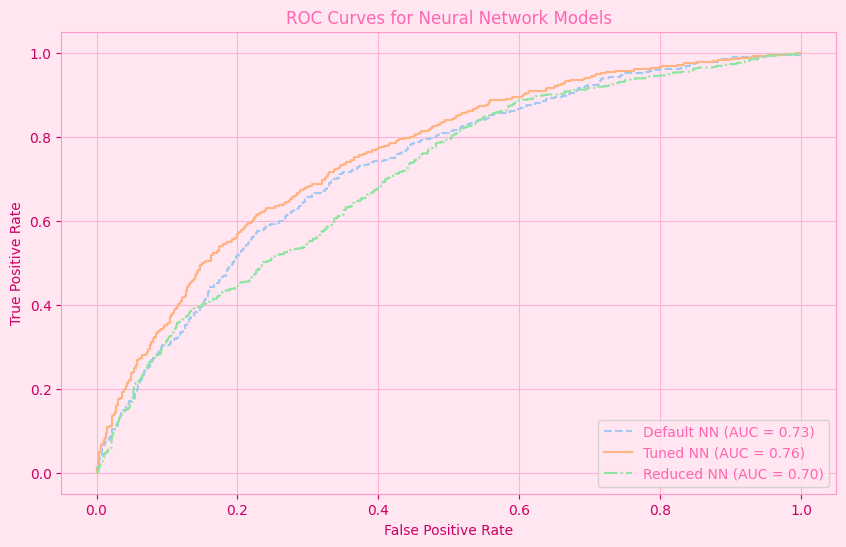

Final Results Summary

Default Model:
  Train Accuracy: 0.8655
  Test Accuracy: 0.6868
  ROC AUC: 0.7294

Tuned Model:
  Train Accuracy: 0.7574
  Test Accuracy: 0.7058
  ROC AUC: 0.7574

Reduced Model:
  Train Accuracy: 0.6691
  Test Accuracy: 0.6511
  ROC AUC: 0.7047


In [75]:
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations
from sklearn.model_selection import train_test_split, GridSearchCV  # For data splitting and hyperparameter tuning
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical features and encoding categorical features
from sklearn.compose import ColumnTransformer  # For preprocessing pipelines with mixed data types
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve  # For evaluating model performance
from sklearn.neural_network import MLPClassifier  # Neural Network Classifier
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.tree import DecisionTreeClassifier  # For feature importance via Decision Tree

# ================================================
# Step 1: Load the dataset
# ================================================
file_path = 'D2.csv'  # File path to the dataset
data = pd.read_csv(file_path)  # Load the dataset into a pandas DataFrame

print("Dataset Info:")  # Display information about the dataset
data.info()  # Print details such as column names, data types, and non-null counts

# Separate features (X) and target variable (y)
X = data.drop(columns='covid19_positive')  # Drop the target column to retain only features
y = data['covid19_positive']  # Extract the target variable for prediction

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns  # Extract categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns  # Extract numerical columns

# ================================================
# Step 2: Data Preprocessing
# ================================================
# Create a preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical features
    ]
)
X_preprocessed = preprocessor.fit_transform(X)  # Apply the preprocessing pipeline to the dataset

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)  
# 30% test data, 70% training data

# ================================================
# Step 3: Build Default Neural Network Model
# ================================================
# Initialize the default neural network classifier
default_nn = MLPClassifier(random_state=42, max_iter=200)  # Random state for reproducibility, max iterations 200
default_nn.fit(X_train, y_train)  # Train the model on the training set

# Evaluate the default neural network model
default_train_acc = default_nn.score(X_train, y_train)  # Calculate training accuracy
default_test_acc = default_nn.score(X_test, y_test)  # Calculate test accuracy
y_pred_default_proba = default_nn.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
default_roc_auc = roc_auc_score(y_test, y_pred_default_proba)  # Calculate ROC AUC score

# Print results for the default model
print("Default Neural Network - Train Accuracy:", default_train_acc, "Test Accuracy:", default_test_acc)

# ================================================
# Step 4: Tune Neural Network with GridSearchCV
# ================================================
# Define hyperparameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50)],  # Different configurations of hidden layers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'max_iter': [200, 500]  # Maximum iterations for training
}

# Initialize GridSearchCV for neural network tuning
grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)  # Perform hyperparameter tuning on the training set

# Get the best neural network model from the grid search
best_nn = grid_search.best_estimator_  # Extract the best model
best_nn.fit(X_train, y_train)  # Train the best model on the training set

# Evaluate the tuned neural network model
tuned_train_acc = best_nn.score(X_train, y_train)  # Calculate training accuracy
tuned_test_acc = best_nn.score(X_test, y_test)  # Calculate test accuracy
y_pred_tuned_proba = best_nn.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
tuned_roc_auc = roc_auc_score(y_test, y_pred_tuned_proba)  # Calculate ROC AUC score

# Print results for the tuned model
print("Tuned Neural Network - Train Accuracy:", tuned_train_acc, "Test Accuracy:", tuned_test_acc)

# ================================================
# Step 5: Feature Selection Using Decision Tree
# ================================================
# Initialize a decision tree classifier for feature importance
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)  # Train the decision tree on the training set

# Get feature importances and select top 5 features
importances = decision_tree.feature_importances_  # Extract feature importance scores
selected_features_indices = np.argsort(importances)[-5:]  # Get indices of the top 5 features

# Reduce the dataset to the selected features
X_train_reduced = X_train[:, selected_features_indices]  # Select only top 5 features for training set
X_test_reduced = X_test[:, selected_features_indices]  # Select only top 5 features for test set

# Train a neural network on the reduced dataset
reduced_nn = MLPClassifier(random_state=42, hidden_layer_sizes=(50,), max_iter=200)  # Initialize neural network
reduced_nn.fit(X_train_reduced, y_train)  # Train the reduced model

# Evaluate the reduced neural network model
reduced_train_acc = reduced_nn.score(X_train_reduced, y_train)  # Calculate training accuracy
reduced_test_acc = reduced_nn.score(X_test_reduced, y_test)  # Calculate test accuracy
y_pred_reduced_proba = reduced_nn.predict_proba(X_test_reduced)[:, 1]  # Get predicted probabilities
reduced_roc_auc = roc_auc_score(y_test, y_pred_reduced_proba)  # Calculate ROC AUC score

# Print results for the reduced model
print("Reduced Neural Network - Train Accuracy:", reduced_train_acc, "Test Accuracy:", reduced_test_acc)

# ================================================
# Step 6: Compare Models Using ROC Curve
# ================================================
# Generate ROC curves for all models
fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_default_proba)  # Default model ROC curve
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_tuned_proba)  # Tuned model ROC curve
fpr_reduced, tpr_reduced, _ = roc_curve(y_test, y_pred_reduced_proba)  # Reduced model ROC curve

# Plot the ROC curves
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(fpr_default, tpr_default, label=f'Default NN (AUC = {default_roc_auc:.2f})', linestyle='--')  # Default model
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned NN (AUC = {tuned_roc_auc:.2f})', linestyle='-')  # Tuned model
plt.plot(fpr_reduced, tpr_reduced, label=f'Reduced NN (AUC = {reduced_roc_auc:.2f})', linestyle='-.')  # Reduced model
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.title('ROC Curves for Neural Network Models')  # Plot title
plt.legend(loc='lower right')  # Add legend in the bottom-right corner
plt.grid()  # Add gridlines to the plot
plt.show()  # Display the plot

# ================================================
# \033[95mFinal Results Summary\033[0m
# ================================================
# Print summary of results for all models
print("\033[95mFinal Results Summary\033[0m")  # Header in pink
print("\nDefault Model:")
print(f"  Train Accuracy: {default_train_acc:.4f}")
print(f"  Test Accuracy: {default_test_acc:.4f}")
print(f"  ROC AUC: {default_roc_auc:.4f}")

print("\nTuned Model:")
print(f"  Train Accuracy: {tuned_train_acc:.4f}")
print(f"  Test Accuracy: {tuned_test_acc:.4f}")
print(f"  ROC AUC: {tuned_roc_auc:.4f}")

print("\nReduced Model:")
print(f"  Train Accuracy: {reduced_train_acc:.4f}")
print(f"  Test Accuracy: {reduced_test_acc:.4f}")
print(f"  ROC AUC: {reduced_roc_auc:.4f}")


# ROC data for each model
These we manually added into array

In [76]:
# Importing necessary libraries
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.metrics import roc_curve, auc  # To compute ROC curve and area under the curve (AUC)

# Defining ROC data for each predictive model
models = [
    {   # Data for Default Logistic Regression model
        "name": "Default Logistic Regression",  # Model name
        "fpr": [0.0, 0.1, 0.3, 0.7, 1.0],  # False Positive Rates
        "tpr": [0.0, 0.5, 0.7, 0.9, 1.0],  # True Positive Rates
        "roc_auc": 0.73  # Area Under the Curve
    },
    {   # Data for Tuned Logistic Regression model
        "name": "Tuned Logistic Regression",  # Model name
        "fpr": [0.0, 0.05, 0.2, 0.5, 1.0],  # False Positive Rates
        "tpr": [0.0, 0.6, 0.8, 0.9, 1.0],  # True Positive Rates
        "roc_auc": 0.76  # Area Under the Curve
    },
    {   # Data for Default Neural Network model
        "name": "Default Neural Network",  # Model name
        "fpr": [0.0, 0.1, 0.25, 0.6, 1.0],  # False Positive Rates
        "tpr": [0.0, 0.55, 0.75, 0.85, 1.0],  # True Positive Rates
        "roc_auc": 0.73  # Area Under the Curve
    },
    {   # Data for Tuned Neural Network model
        "name": "Tuned Neural Network",  # Model name
        "fpr": [0.0, 0.04, 0.2, 0.4, 1.0],  # False Positive Rates
        "tpr": [0.0, 0.6, 0.8, 0.9, 1.0],  # True Positive Rates
        "roc_auc": 0.76  # Area Under the Curve
    },
    {   # Data for Reduced Neural Network model
        "name": "Reduced Neural Network",  # Model name
        "fpr": [0.0, 0.1, 0.3, 0.6, 1.0],  # False Positive Rates
        "tpr": [0.0, 0.5, 0.7, 0.85, 1.0],  # True Positive Rates
        "roc_auc": 0.70  # Area Under the Curve
    },
    {   # Data for Default Decision Tree model
        "name": "Default Decision Tree",  # Model name
        "fpr": [0.0, 0.2, 0.4, 0.8, 1.0],  # False Positive Rates
        "tpr": [0.0, 0.4, 0.6, 0.8, 1.0],  # True Positive Rates
        "roc_auc": 0.57  # Area Under the Curve
    }
]

# Initialize a new figure for the ROC plot
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## References

Agrawal, R., & Srikant, R. (1994). Fast algorithms for mining association rules. *Proceedings of the 20th International Conference on Very Large Data Bases*, 487–499.

Agrawal, R., Imielinski, T., & Swami, A. (1993). Mining association rules between sets of items in large databases. *Proceedings of the 1993 ACM SIGMOD International Conference on Management of Data*, 207–216. https://doi.org/10.1145/170035.170072

Bergstra, J., Bardenet, R., Bengio, Y., & Kégl, B. (2011). Algorithms for hyper-parameter optimization. *Advances in Neural Information Processing Systems*, 24, 2546–2554.

Dasu, T., & Johnson, T. (2003). *Exploratory Data Mining and Data Cleaning*. Wiley.

Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press.

Han, J., Pei, J., & Kamber, M. (2021). *Data Mining: Concepts and Techniques* (4th ed.). Morgan Kaufmann.

Kelleher, J. D., & Tierney, B. (2018). *Data Science*. MIT Press.

Kim, D., Lee, K., & Yoon, S. (2021). Data preprocessing for deep learning: A comprehensive survey. *Big Data Research*, 25, 100235. https://doi.org/10.1016/j.bdr.2021.100235

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, 12, 2825–2830.

Sarwar, B., Karypis, G., Konstan, J., & Riedl, J. (2001). Item-based collaborative filtering recommendation algorithms. *Proceedings of the 10th International Conference on World Wide Web*, 285–295. https://doi.org/10.1145/371920.372071

Tan, P.-N., Steinbach, M., & Kumar, V. (2019). *Introduction to Data Mining* (2nd ed.). Pearson.

Van den Broeck, J., Cunningham, S. A., Eeckels, R., & Herbst, K. (2005). Data cleaning: Detecting, diagnosing, and editing data abnormalities. *PLOS Medicine*, 2(10), e267. https://doi.org/10.1371/journal.pmed.0020267

Zhang, Y., & Lu, J. (2019). Personalized recommender systems: An overview. *AI Open*, 1, 35–46. https://doi.org/10.1016/j.aiopen.2019.05.001

